### Contents
    01. Importing libraries and data
    02. Comparing customer profiles with regions and departments
       a. Data check and subsetting
       b. Age Profile
       c. Income Profile
       d. Number of dependants Profile
       e. Baby stuff Profile
       f. Pet Profile
#### 03. Additional visualizations and analysis
#### 04. Exporting visualizations

# Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create project path
path = r'/Users/gwynreniers/Documents/Instacart Analysis'
path

'/Users/gwynreniers/Documents/Instacart Analysis'

In [3]:
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

# 2. Comparing regional customer profiles

In [4]:
#Checking the imported data
df.shape

(32399093, 42)

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,department,region,total_orders,age_group,income_group,dependant_flag,baby_status,pet_status,veggie_status,alcohol_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0


In [7]:
#Creating a subset with unique customers
df_unique=df.drop_duplicates(subset='user_id')

In [8]:
#Number of customer groups in each region
age_region=pd.crosstab(df_unique['region'], df_unique['age_group'].sort_values(ascending=False))
age_region=age_region.reindex(['Young Adult', 'Adult', 'Senior'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
age_region

age_group,Young Adult,Adult,Senior
region,,,
South,19411,21253,27771
West,14813,16365,21181
Midwest,13463,15365,19530
Northeast,10117,11368,14773


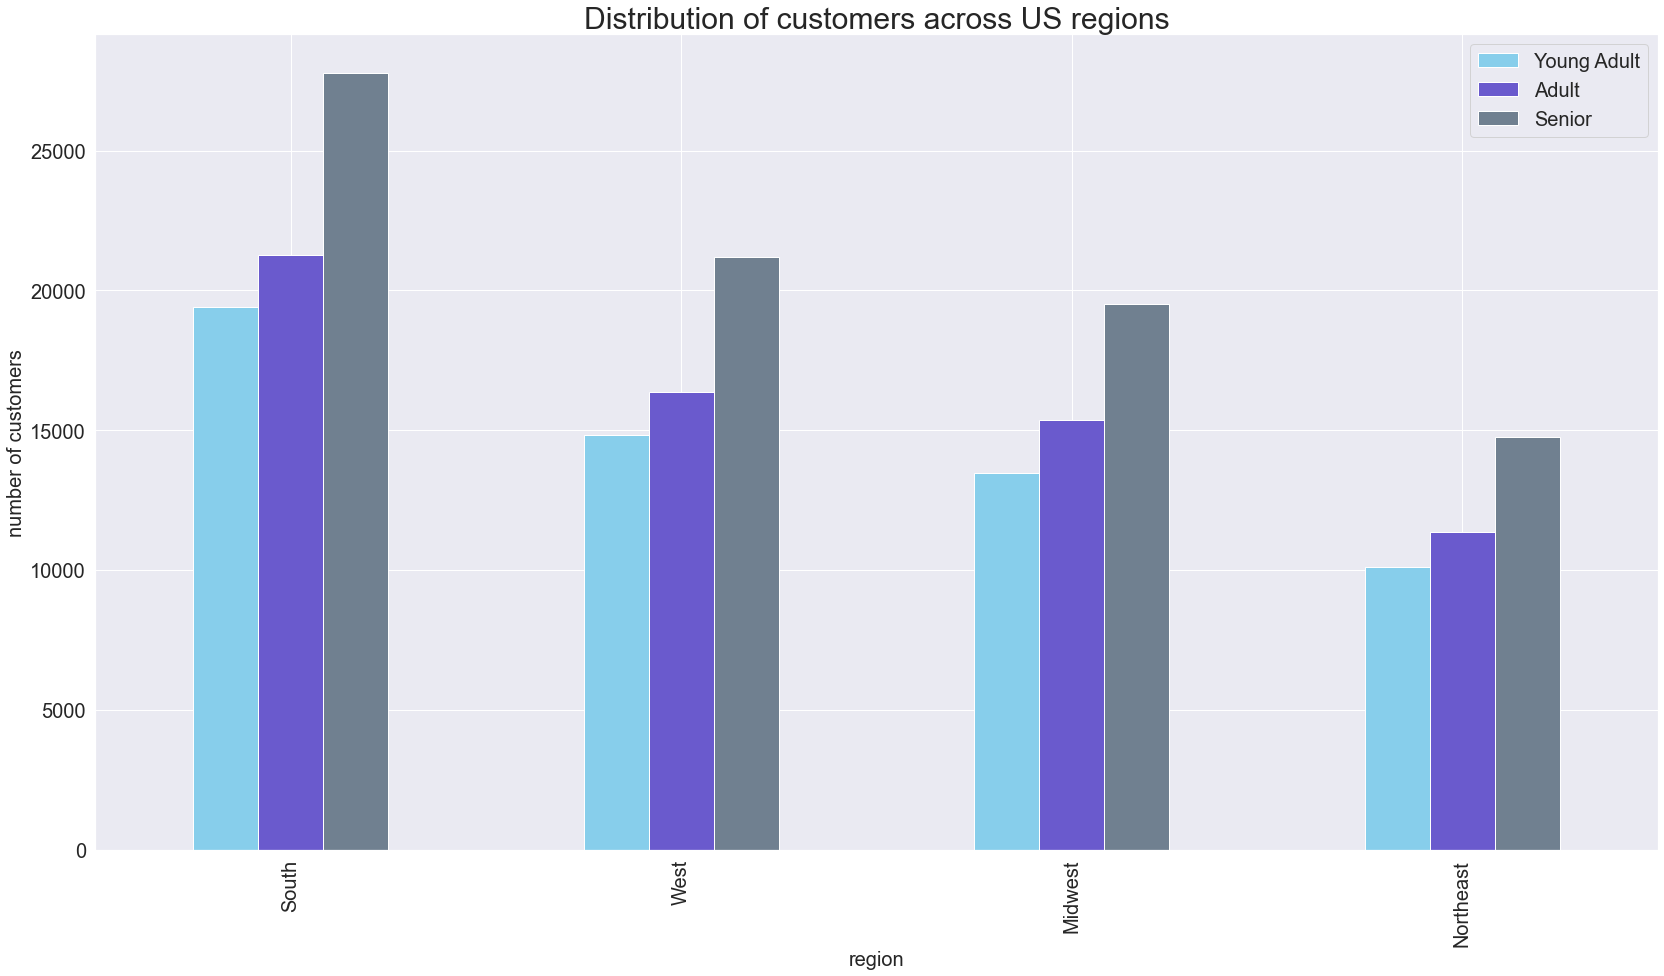

In [9]:
#Setting script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
#Grouped bar chart of customer groups and regions
bar_age_region=age_region.plot.bar(color=['#87CEEB', '#6A5ACD','#708090'], fontsize=20)
plt.title('Distribution of customers across US regions', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)
plt.legend(fontsize=20)

In [10]:
#Number of orders per department
df['department'].value_counts(dropna=False)

produce            9477983
dairy eggs         5397913
snacks             2887046
beverages          2687138
frozen             2234310
pantry             1875021
bakery             1172233
canned goods       1067940
deli               1051107
dry goods pasta     866527
household           738410
meat seafood        708803
breakfast           702916
personal care       447452
babies              423768
international       269220
alcohol             153622
pets                 97704
missing              69133
other                36281
bulk                 34566
Name: department, dtype: int64

In [11]:
#Distribution of orders by age
df['age_group'].value_counts()

Senior         13089812
Adult          10164405
Young Adult     9144876
Name: age_group, dtype: int64

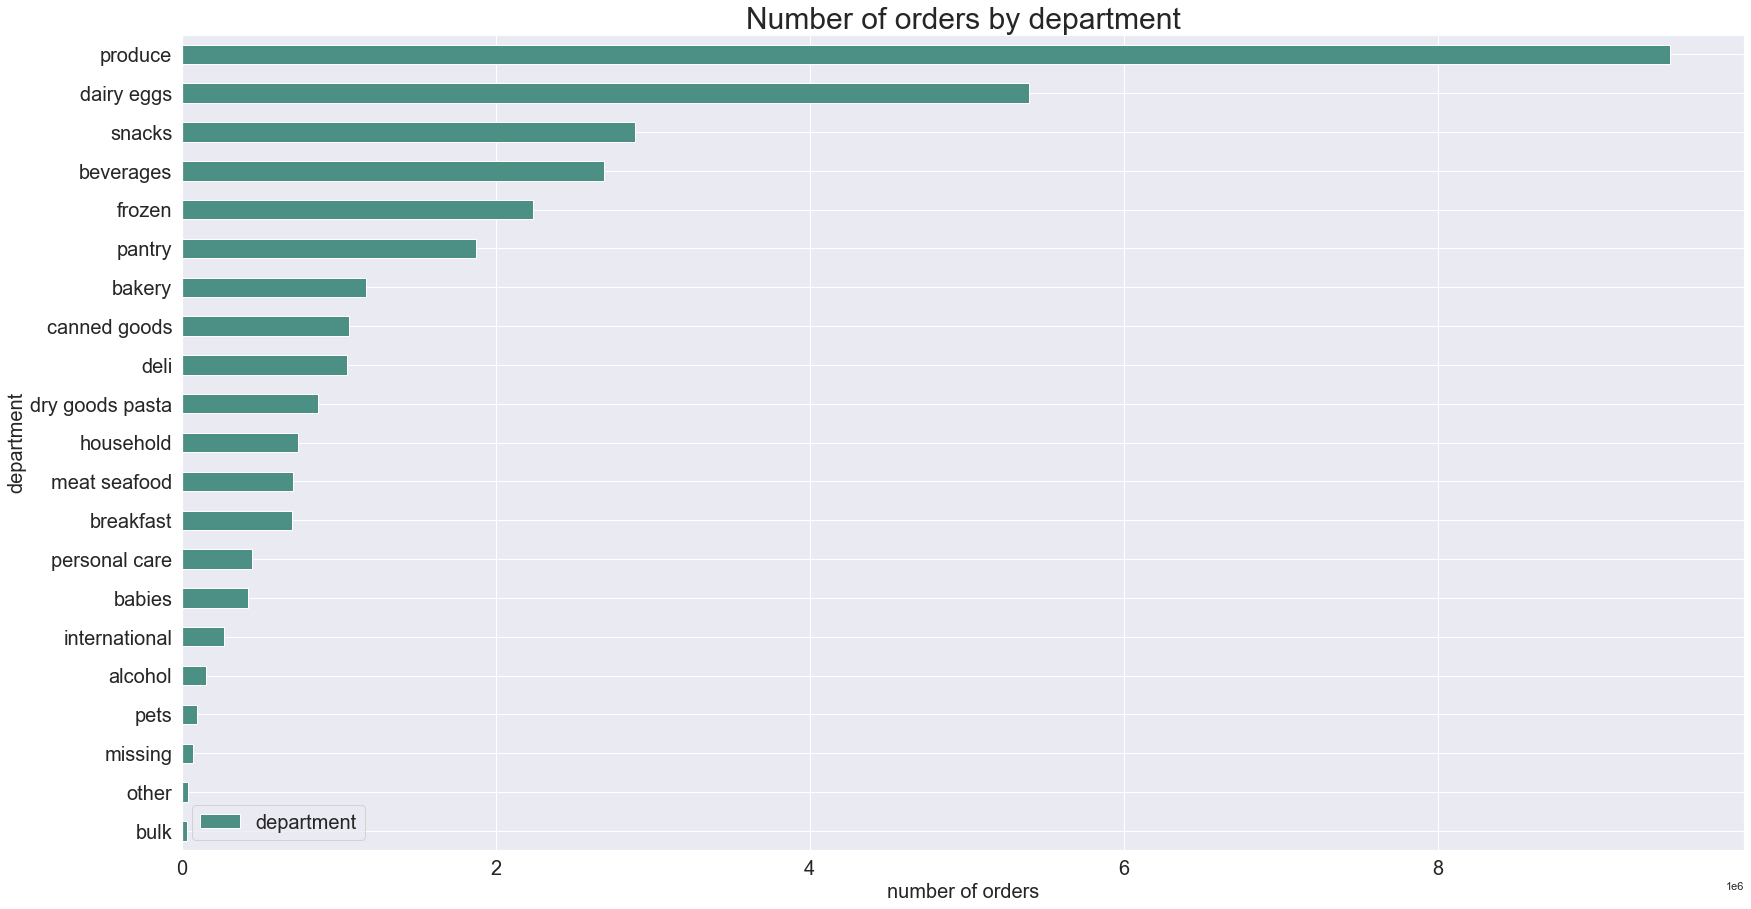

In [12]:
#Number of orders across departments
bar_department_orders=df['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['#4c9085'], fontsize=20)
plt.title('Number of orders by department', fontsize=30)
plt.xlabel('number of orders', fontsize=20)
plt.ylabel('department', fontsize=20)
plt.legend(fontsize=20)

In [13]:
#Distribution of orders by age groups across departments
age_department=pd.crosstab(df['department'], df['age_group'])
age_department=age_department.reindex(['Young Adult', 'Adult', 'Senior'], axis="columns")
age_department

age_group,Young Adult,Adult,Senior
department,,,
alcohol,44904,47853,60865
babies,117398,138503,167867
bakery,331824,367399,473010
beverages,749988,843715,1093435
breakfast,200578,220522,281816
bulk,9926,10745,13895
canned goods,303139,334203,430598
dairy eggs,1533815,1690711,2173387
deli,297154,328627,425326


In [14]:
df_age_department=df.loc[df['department'].isin(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])]

In [15]:
#creating cross tabs to display labels and age group/departments
age_department_5=pd.crosstab(index=df_age_department['department'], columns=df_age_department['age_group'], normalize='index')
age_department_5=age_department_5.reindex(['Young Adult', 'Adult', 'Senior'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
age_department_5_labels=pd.crosstab(index=df_age_department['department'], columns=df_age_department['age_group'])
age_department_5_labels=age_department_5_labels.reindex(['Young Adult', 'Adult', 'Senior'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])

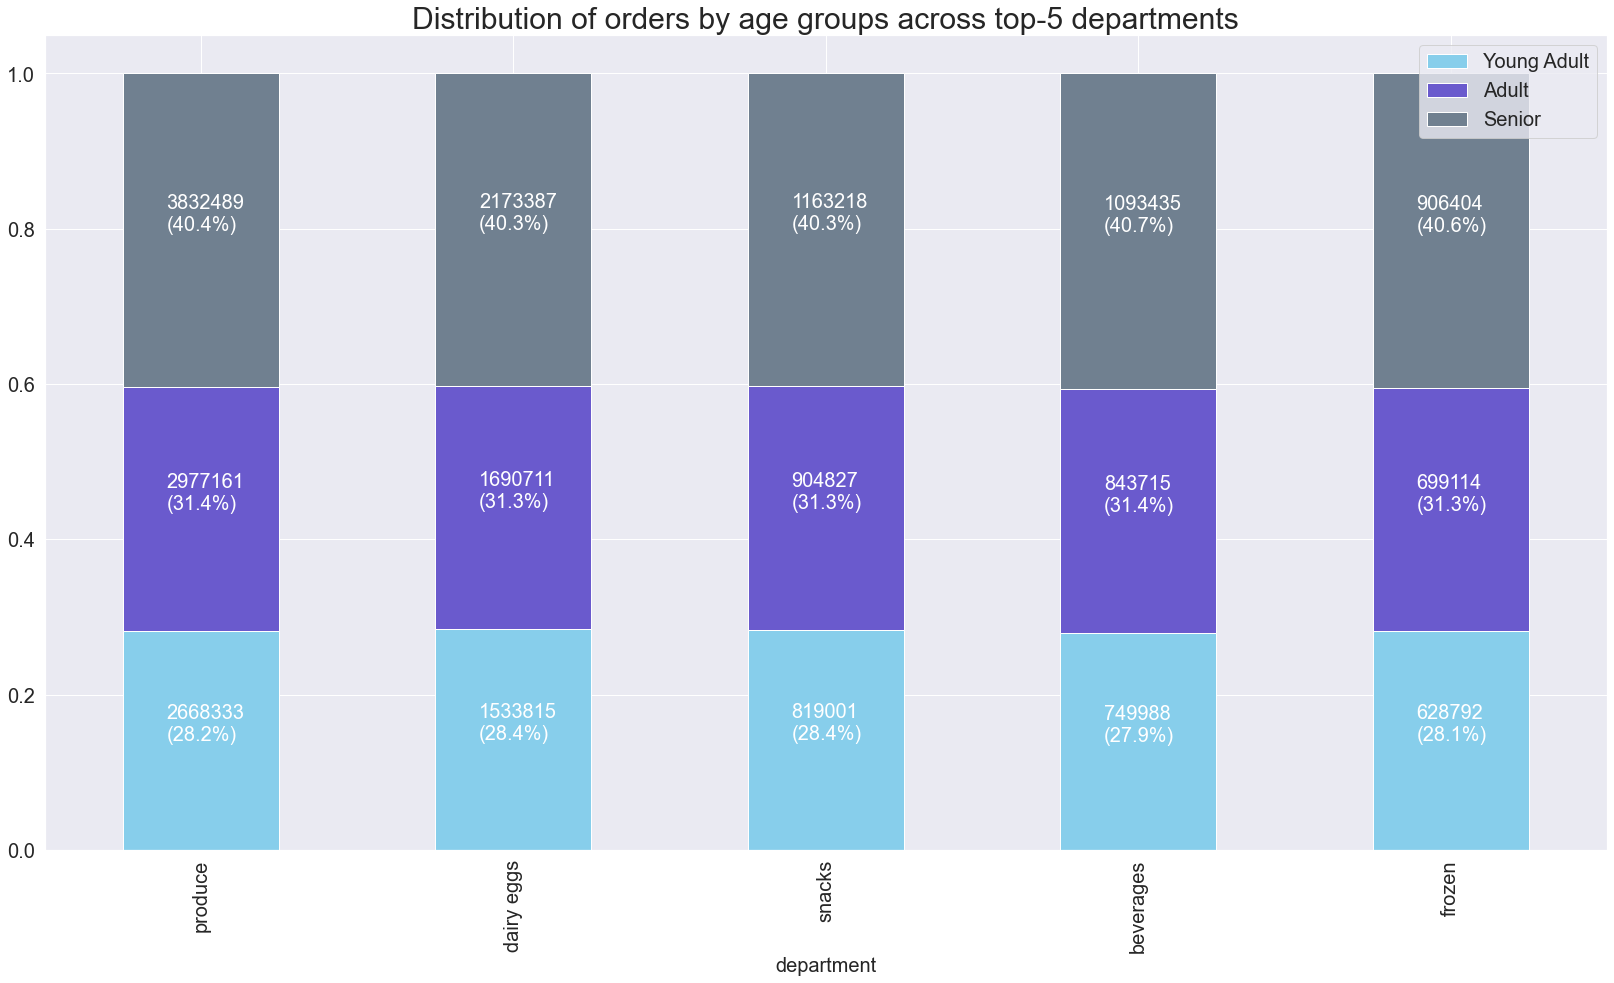

In [79]:
#Distribution of orders by age groups across top-5 departments
bar_age_department=age_department_5.plot.bar(stacked=True,color=['#87CEEB', '#6A5ACD','#708090'], fontsize=20)
plt.title('Distribution of orders by age groups across top-5 departments', fontsize=30)
plt.xlabel('department', fontsize=20)
plt.legend(fontsize=20)
for n, y in enumerate([*age_department_5.index.values]):
    for (proportion, count, x_loc) in zip(age_department_5.loc[y],
                                         age_department_5_labels.loc[y],
                                          age_department_5.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [17]:
#Orders by young aged customers
df.loc[df['age_group']=='Young Adult']['department'].value_counts()

produce            2668333
dairy eggs         1533815
snacks              819001
beverages           749988
frozen              628792
pantry              529009
bakery              331824
canned goods        303139
deli                297154
dry goods pasta     245315
household           206791
breakfast           200578
meat seafood        199019
personal care       125085
babies              117398
international        76643
alcohol              44904
pets                 27721
missing              20030
other                10411
bulk                  9926
Name: department, dtype: int64

In [18]:
#Orders by middle aged customers
df.loc[df['age_group']=='Adult']['department'].value_counts()

produce            2977161
dairy eggs         1690711
snacks              904827
beverages           843715
frozen              699114
pantry              586860
bakery              367399
canned goods        334203
deli                328627
dry goods pasta     271693
household           232010
meat seafood        220637
breakfast           220522
personal care       141788
babies              138503
international        85042
alcohol              47853
pets                 29896
missing              21675
other                11424
bulk                 10745
Name: department, dtype: int64

In [19]:
#Orders by older aged customers
df.loc[df['age_group']=='Senior']['department'].value_counts()

produce            3832489
dairy eggs         2173387
snacks             1163218
beverages          1093435
frozen              906404
pantry              759152
bakery              473010
canned goods        430598
deli                425326
dry goods pasta     349519
household           299609
meat seafood        289147
breakfast           281816
personal care       180579
babies              167867
international       107535
alcohol              60865
pets                 40087
missing              27428
other                14446
bulk                 13895
Name: department, dtype: int64

In [20]:
#Relationship between royalty flag and age group
age_loyalty=pd.crosstab(df_unique['age_group'], df_unique['loyalty_flag'].sort_values(ascending=False))
age_loyalty=age_loyalty.reindex(['Young Adult', 'Adult', 'Senior'])
age_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
Young Adult,4706,31512,21586
Adult,5367,34846,24138
Senior,6944,45171,31140


<AxesSubplot:>

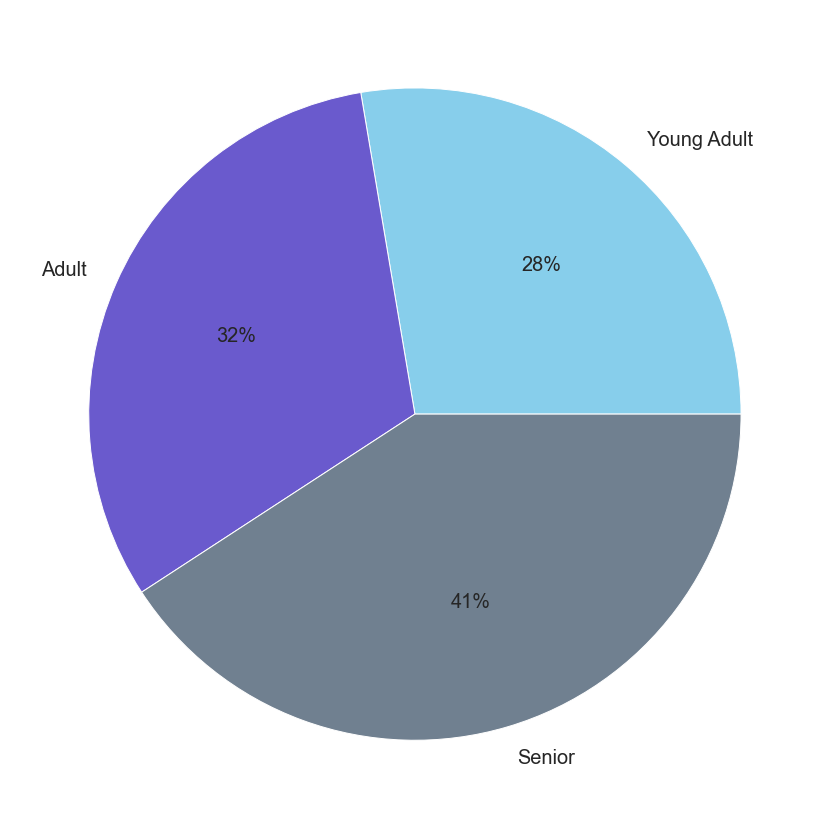

In [80]:
#Loyalty flag for Young Adult customers
pie_loyal_age=age_loyalty['Loyal customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#87CEEB', '#6A5ACD','#708090'], textprops={'fontsize': 20})
pie_loyal_age

<AxesSubplot:>

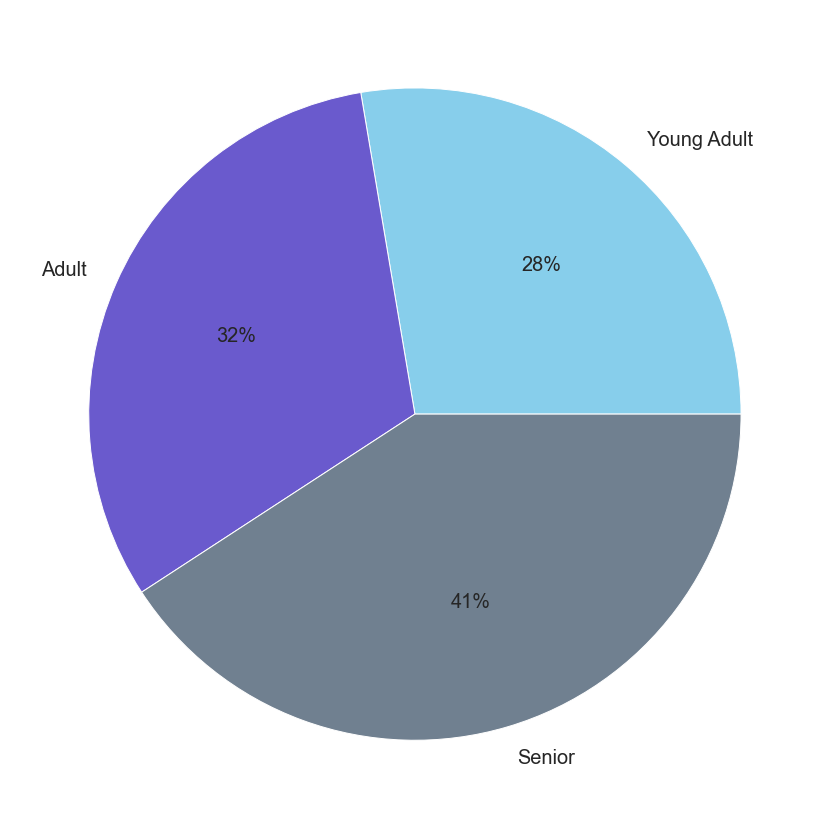

In [84]:
#Loyalty flag for Adult customers
pie_loyal_age=age_loyalty['Loyal customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#87CEEB', '#6A5ACD','#708090'], textprops={'fontsize': 20})
pie_loyal_age

<AxesSubplot:>

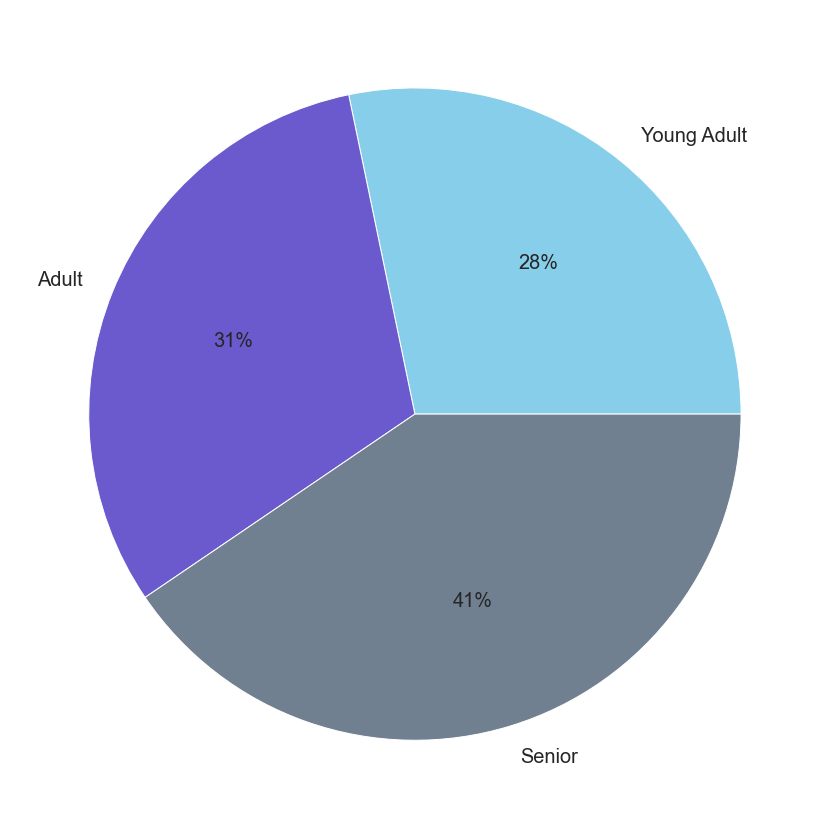

In [82]:
#Loyalty flags for Senior customers
pie_new_age=age_loyalty['New customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#87CEEB', '#6A5ACD','#708090'], textprops={'fontsize': 20})
pie_new_age

In [31]:
age_ordertime=pd.crosstab(df['order_hour_of_day'], df['age_group'])
age_ordertime=age_ordertime.reindex(['Young Adult', 'Adult', 'Senior'], axis="columns")
age_ordertime

age_group,Young Adult,Adult,Senior
order_hour_of_day,,,
0,63180,68661,86882
1,32998,36754,45919
2,20300,21384,27671
3,14954,15384,20937
4,15609,15179,22444
5,24876,26399,36671
6,84580,88506,117356
7,251845,273948,365094
8,482479,539746,695549


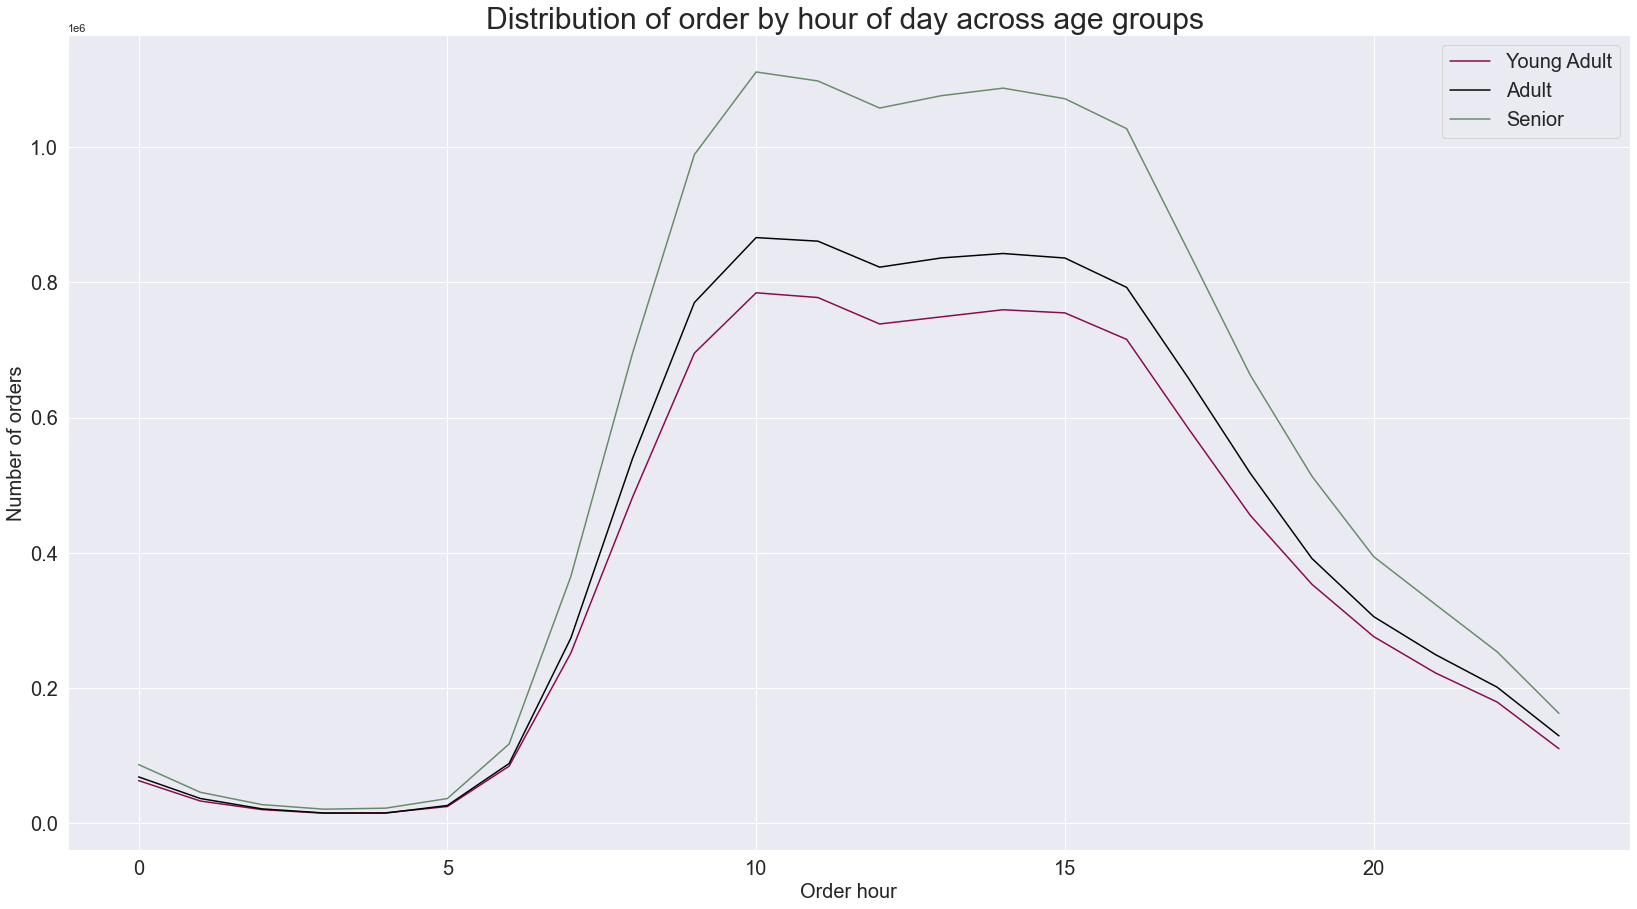

In [37]:
#Plotting linechart of orders by age groups
line_age_ordertime=age_ordertime.plot(kind='line', color=['#8B0A50', '#030303','#698B69'], fontsize=20)
plt.title('Distribution of order by hour of day across age groups ', fontsize=30)
plt.xlabel('Order hour', fontsize=20)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(fontsize=20)

In [39]:
#Orders by day of week
age_orderday=pd.crosstab(df['orders_day_of_week'], df['age_group'])
age_orderday=age_orderday.reindex(['Young Adult', 'Adult', 'Senior'], axis="columns").rename(index={0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
age_orderday

age_group,Young Adult,Adult,Senior
orders_day_of_week,,,
Saturday,1754839,1942817,2505534
Sunday,1616581,1768366,2274286
Monday,1181159,1329348,1702577
Tuesday,1077515,1203461,1558817
Wednesday,1072152,1187640,1523357
Thursday,1185271,1321474,1698248
Friday,1257359,1411299,1826993


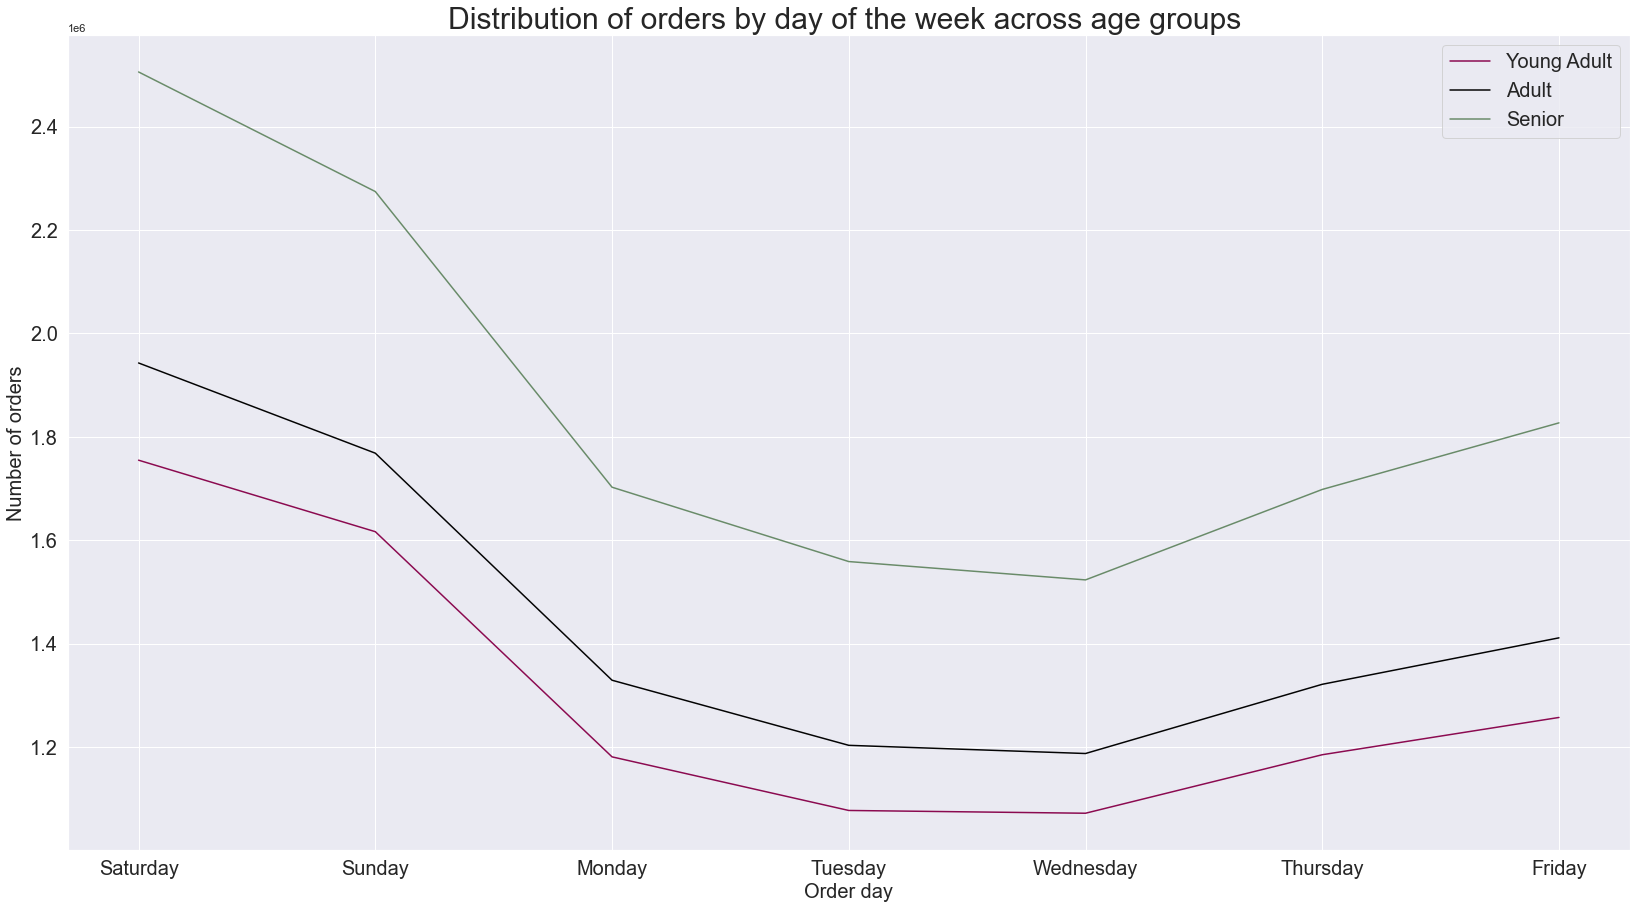

In [40]:
#Plotting linechart of orders by age groups
line_age_orderday=age_orderday.plot(kind='line', color=['#8B0A50', '#030303','#698B69'], fontsize=20)
plt.title('Distribution of orders by day of the week across age groups ', fontsize=30)
plt.xlabel('Order day', fontsize=20)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(fontsize=20)

## c. Income Profile

In [69]:
# Create income flags
df_unique.loc[df_unique['income']<50000, 'income_flag'] = 'Low Income'
df_unique.loc[(df_unique['income']>=50000) & (df_unique['income']<=120000), 'income_flag'] = 'Middle Income'
df_unique.loc[df_unique['income']>120000, 'income_flag'] = 'High Income'
df_unique['income_flag'].value_counts(dropna = False)

Middle Income    115455
High Income       56152
Low Income        33803
Name: income_flag, dtype: int64

In [70]:
#Distribution of income groups across regions
income_region=pd.crosstab(df_unique['region'], df_unique['income_flag'].sort_values(ascending=False))
income_region=income_region.reindex(['Low Income', 'Middle Income', 'High Income'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
income_region

income_flag,Low Income,Middle Income,High Income
region,,,
South,11256,38647,18532
West,8681,29447,14231
Midwest,7923,27093,13342
Northeast,5943,20268,10047


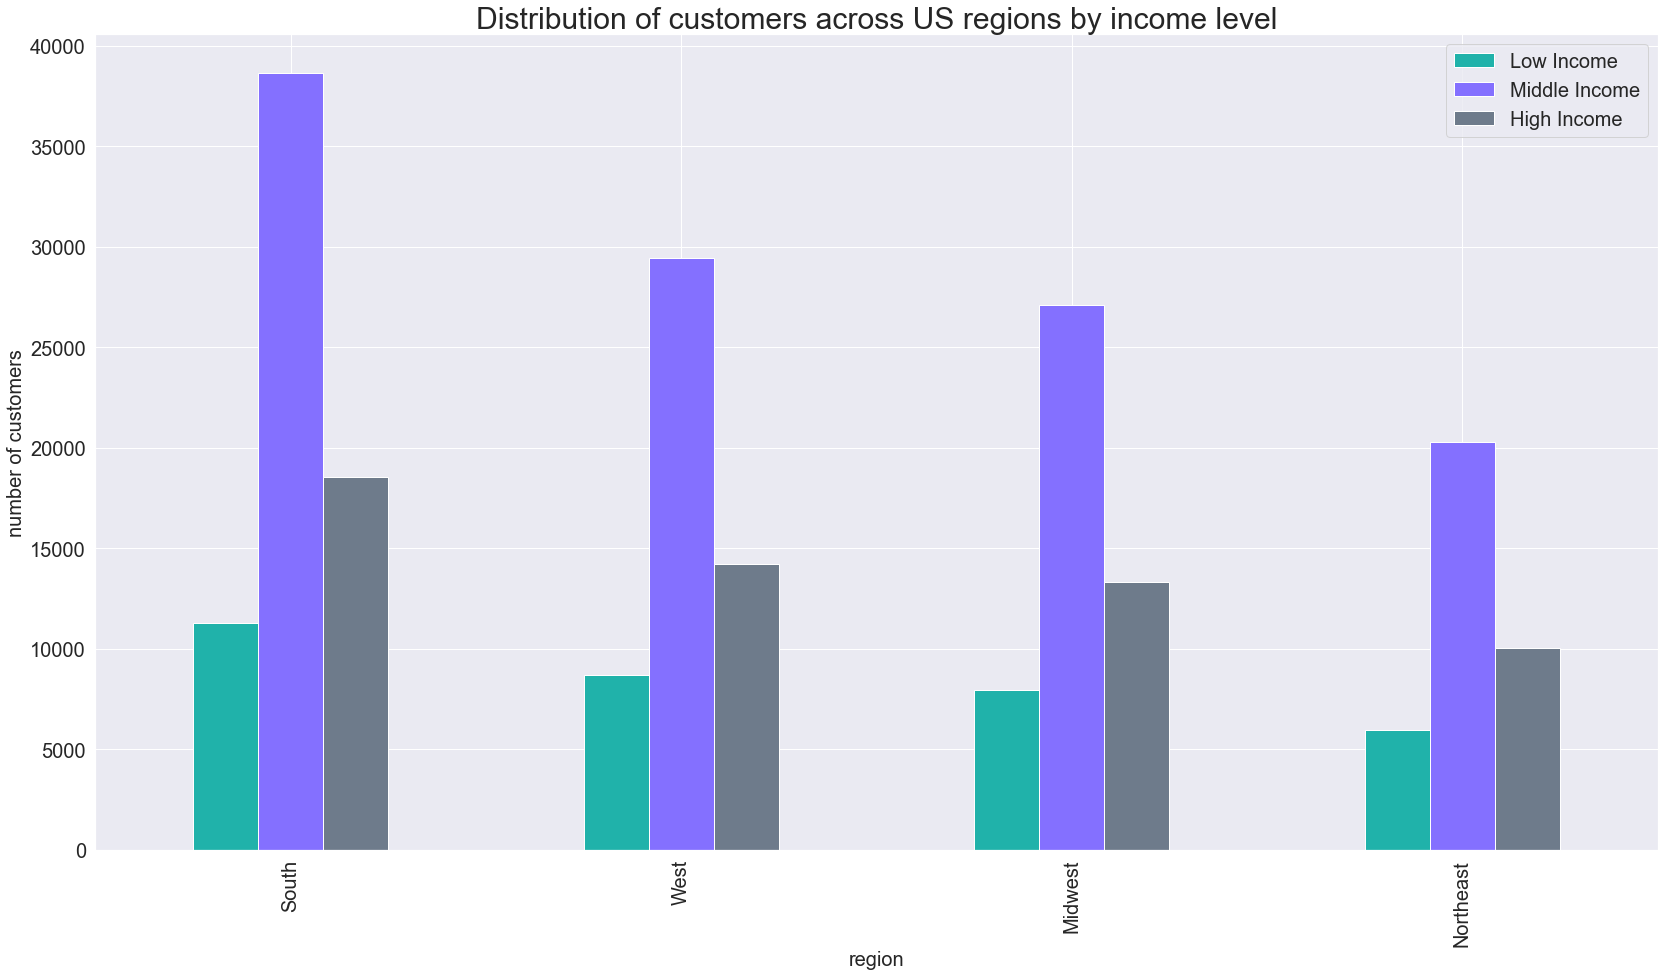

In [71]:
#Grouped bar chart of income groups and regions
bar_income_region=income_region.plot.bar(color=['#20B2AA', '#8470FF','#6E7B8B'], fontsize=20)
plt.title('Distribution of customers across US regions by income level', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)
plt.legend(fontsize=20)

In [72]:
#Orders by Low Income customers
df.loc[df['income_group']=='Low Income']['department'].value_counts()

produce            962138
snacks             627562
dairy eggs         579591
beverages          431392
frozen             252312
pantry             194655
bakery             124386
deli               122796
breakfast          103998
household          100431
canned goods        94952
dry goods pasta     77683
personal care       55501
meat seafood        41483
babies              34982
international       25390
alcohol             21063
pets                10113
missing              7832
bulk                 5212
other                4474
Name: department, dtype: int64

In [73]:
#Orders by Middle Income customers
df.loc[df['income_group']=='Middle Income']['department'].value_counts()

produce            7667765
dairy eggs         4319282
snacks             2029096
beverages          2016583
frozen             1771020
pantry             1503336
bakery              933406
canned goods        871006
deli                832319
dry goods pasta     706896
meat seafood        597301
household           566112
breakfast           536326
personal care       350871
babies              349293
international       218757
alcohol             112902
pets                 77434
missing              55023
other                28388
bulk                 26804
Name: department, dtype: int64

In [74]:
#Orders by High Income customers
df.loc[df['income_group']=='High Income']['department'].value_counts()

produce            848080
dairy eggs         499040
beverages          239163
snacks             230388
frozen             210978
pantry             177030
bakery             114441
canned goods       101982
deli                95992
dry goods pasta     81948
household           71867
meat seafood        70019
breakfast           62592
personal care       41080
babies              39493
international       25073
alcohol             19657
pets                10157
missing              6278
other                3419
bulk                 2550
Name: department, dtype: int64

In [76]:
#creating cross tabs to display labels and age group/departments
income_price=pd.crosstab(index=df['price_range_loc'], columns=df['income_group'], normalize='index')
income_price=income_price.reindex(['Low Income', 'Middle Income', 'High Income'], axis="columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label=pd.crosstab(index=df['price_range_loc'], columns=df['income_group'])
income_price_label=income_price_label.reindex(['Low Income', 'Middle Income', 'High Income'], axis="columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label

income_group,Low Income,Middle Income,High Income
price_range_loc,,,
Low-range product,1591045,7652605,880692
Mid-range product,2265616,17565452,2026070
High-range product,21285,351863,44465


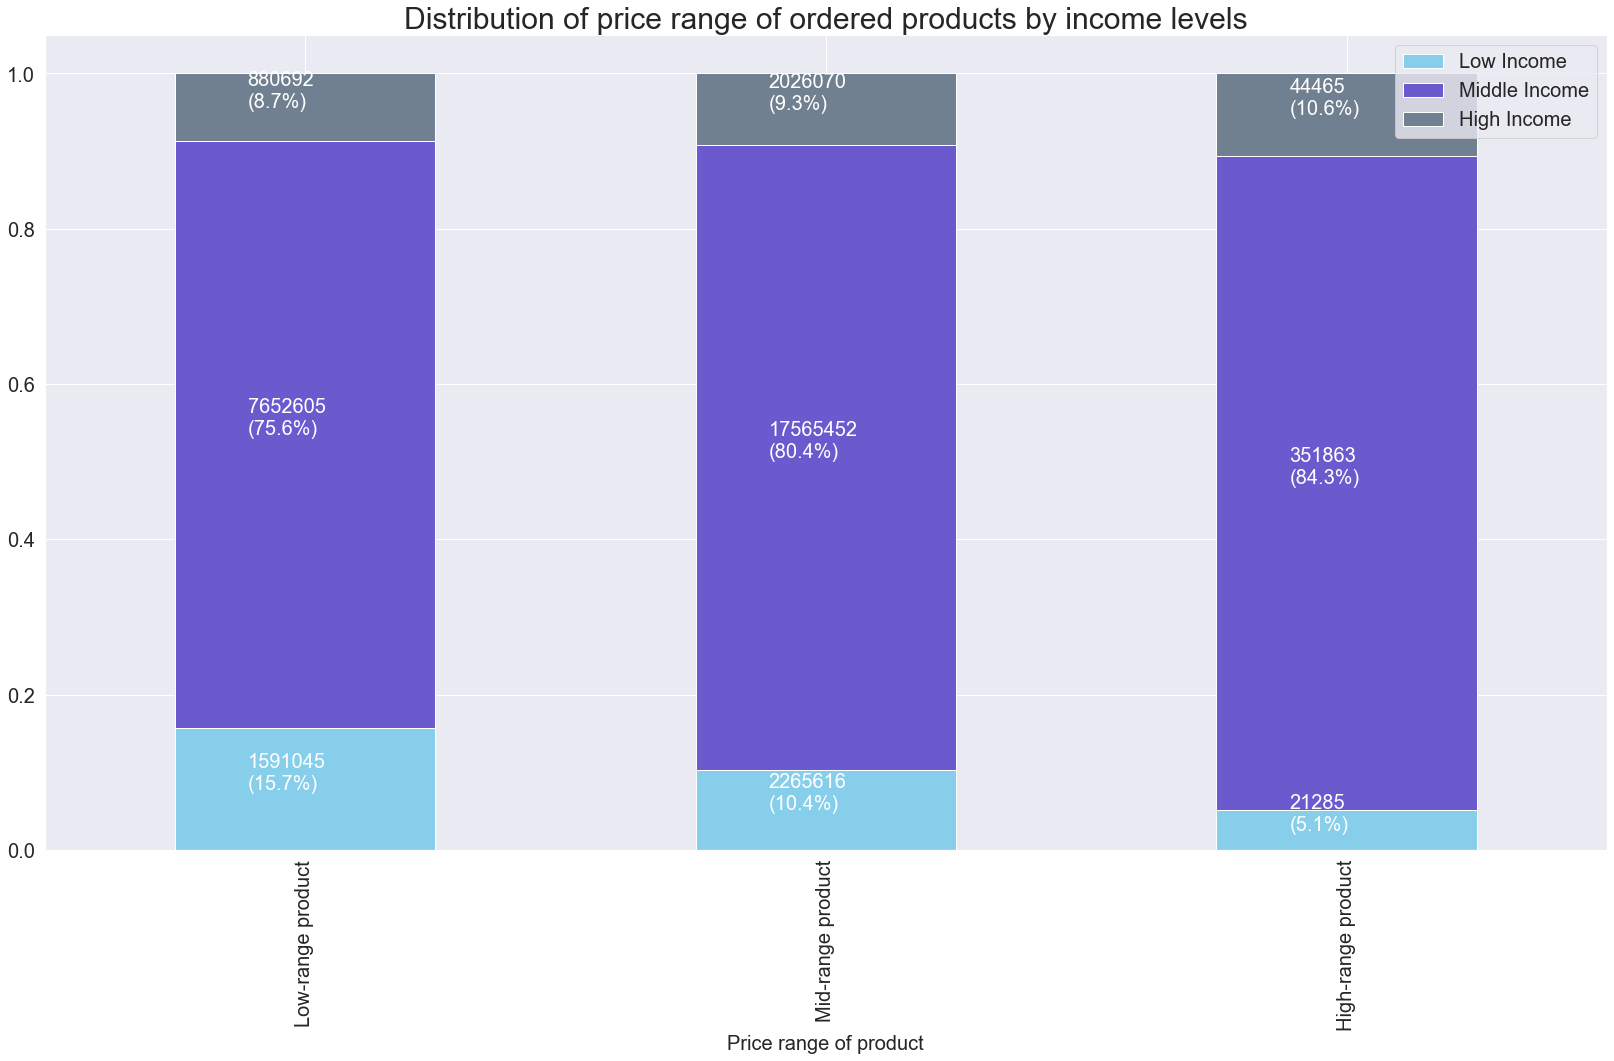

In [85]:
#Comparing level of income and price range of ordered products
bar_income_price=income_price.plot.bar(stacked=True,color=['#87CEEB', '#6A5ACD','#708090'], fontsize=20)
plt.title('Distribution of price range of ordered products by income levels', fontsize=30)
plt.xlabel('Price range of product', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*income_price.index.values]):
    for (proportion, count, x_loc) in zip(income_price.loc[y],
                                         income_price_label.loc[y],
                                         income_price.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [86]:
#Loyalty flags by income groups
income_loyalty=pd.crosstab(df_unique['loyalty_flag'], df_unique['income_group'])
income_loyalty

income_group,High Income,Low Income,Middle Income
loyalty_flag,,,
Loyal customer,1546,2280,13191
New customer,8425,21788,81316
Regular customer,6601,11885,58378


## d. Number of dependants Profile

In [88]:
#Dependants
dependant=pd.crosstab(df_unique['marital_status'], df_unique['dependant_flag'])
dependant

dependant_flag,No dependants,Parent
marital_status,,
divorced/widowed,17569,0
living with parents and siblings,0,9665
married,0,144351
single,33825,0


In [91]:
#creating cross tabs to display labels and age group/departments
dependant_frequency=pd.crosstab(index=df_unique['Frequency_flag'], columns=df_unique['dependant_flag'], normalize='index')
dependant_frequency_label=pd.crosstab(index=df_unique['Frequency_flag'], columns=df_unique['dependant_flag'])
dependant_frequency_label


dependant_flag,No dependants,Parent
Frequency_flag,,
Frequent customer,49071,147415
New customer,2,4
Regular customer,2321,6597


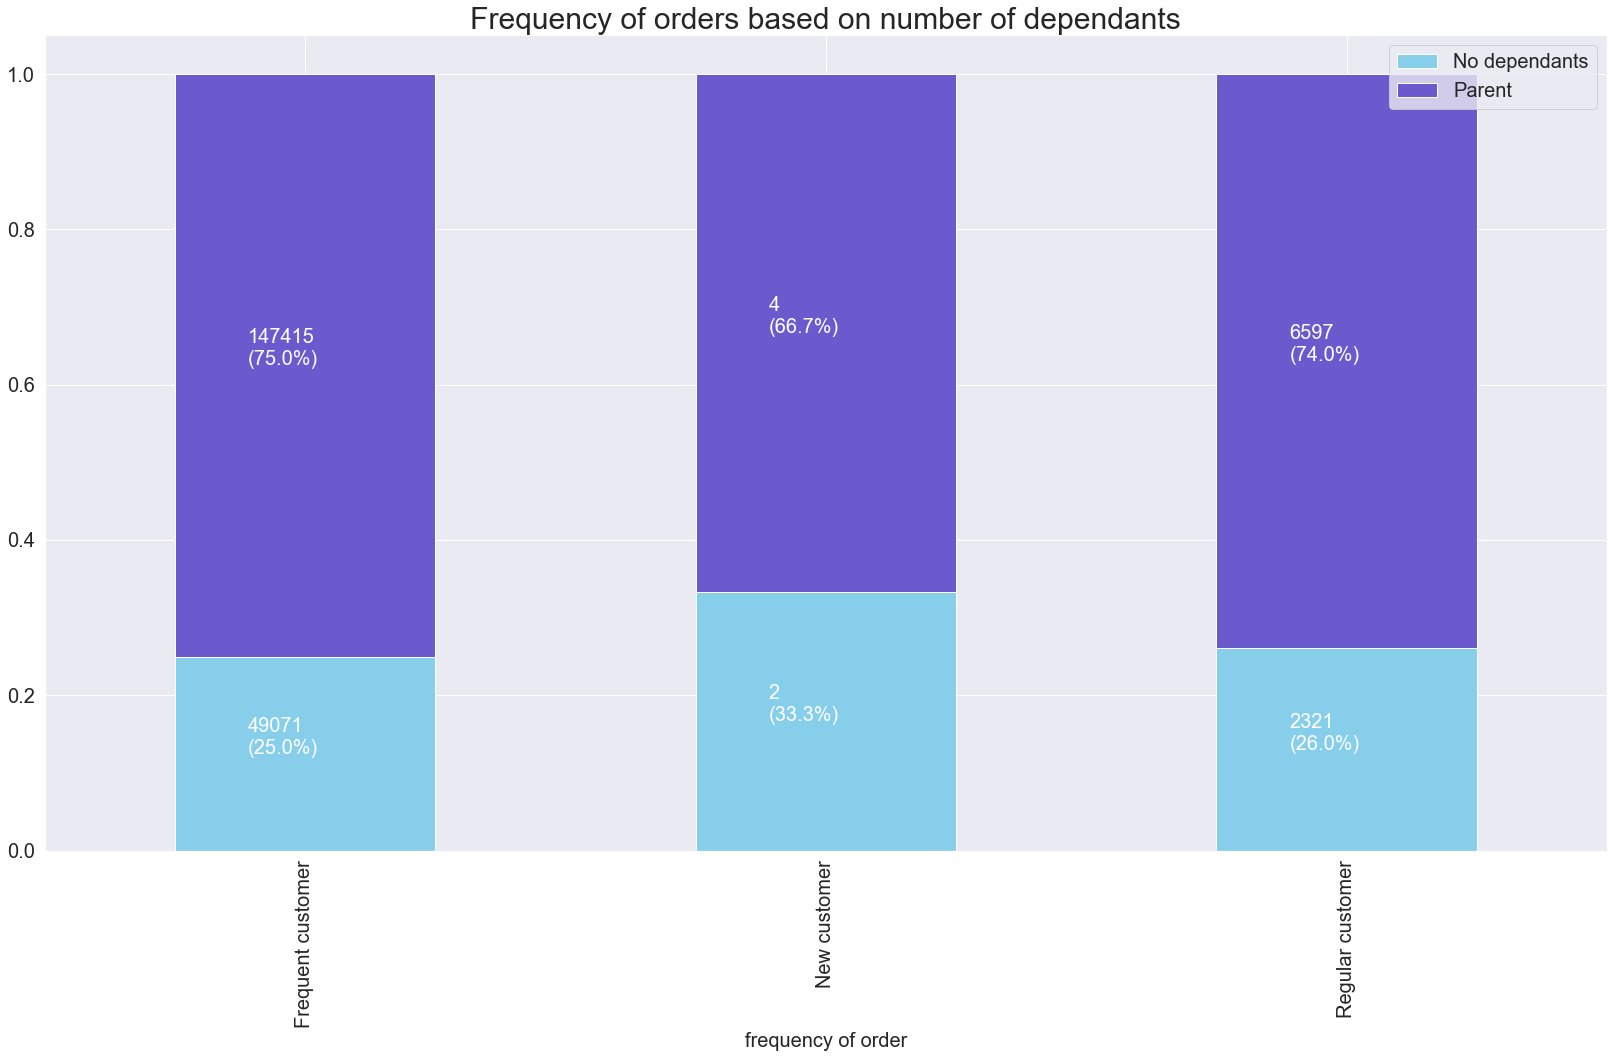

In [92]:
#Frequency of orders based on dependants
bar_dependant_frequency=dependant_frequency.plot.bar(stacked=True,color=['#87CEEB', '#6A5ACD','#708090'], fontsize=20)
plt.title('Frequency of orders based on number of dependants', fontsize=30)
plt.xlabel('frequency of order', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*dependant_frequency.index.values]):
    for (proportion, count, x_loc) in zip(dependant_frequency.loc[y],
                                        dependant_frequency_label.loc[y],
                                         dependant_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

## e. Baby stuff Profile

In [156]:
df2=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.csv'))
df2

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_of_dependants,marital_status,income,activity_flag,department,region,total_orders
0,5980,1384521,6206,3,3,10,29.0,196,1,0,...,Michigan,40,10/28/2018,1,married,30652,Low Activity,beverages,Midwest,4
1,5981,2058522,6206,2,2,11,15.0,39108,2,0,...,Michigan,40,10/28/2018,1,married,30652,Low Activity,beverages,Midwest,4
2,8920,2534676,9346,1,1,12,NaN,196,1,0,...,Idaho,42,1/9/2018,2,married,149794,Low Activity,beverages,West,4
3,8921,1012417,9346,2,1,10,30.0,196,1,1,...,Idaho,42,1/9/2018,2,married,149794,Low Activity,beverages,West,4
4,8922,2485013,9346,3,4,16,30.0,196,1,1,...,Idaho,42,1/9/2018,2,married,149794,Low Activity,beverages,West,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,32367399,531005,148034,3,5,14,4.0,29659,1,0,...,Oregon,54,10/4/2017,0,single,95059,Low Activity,other,West,4
2878,32367400,2860634,116517,2,6,10,17.0,44405,1,0,...,Maryland,71,8/4/2017,2,married,166118,Low Activity,other,South,3
2879,32401896,2546280,109131,3,4,9,30.0,5161,1,0,...,South Dakota,41,1/2/2018,0,single,36708,Low Activity,bulk,Midwest,3
2880,32401970,532733,1860,4,2,18,15.0,5161,1,0,...,New Hampshire,35,3/13/2019,1,married,37960,Low Activity,bulk,Northeast,4


In [168]:
frames = [df_unique, df2]
df_baby = pd.concat(frames)
df_baby


,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,dependant_flag,baby_status,pet_status,veggie_status,alcohol_status,income_flag,Income_flag,Middle Income,income_flage,Unnamed: 0
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Parent,0.0,0.0,1.0,0.0,Low Income,NaN,NaN,NaN,NaN
13,2968173,15,15,1,9,7.0,196,2,0,Soda,...,No dependants,0.0,0.0,0.0,0.0,Middle Income,Middle Income,Middle Income,Middle Income,NaN
33,2293453,19,2,5,14,6.0,196,3,0,Soda,...,Parent,0.0,0.0,1.0,0.0,High Income,NaN,NaN,NaN,NaN
59,1573906,21,10,3,10,6.0,196,2,0,Soda,...,No dependants,0.0,0.0,1.0,1.0,High Income,NaN,NaN,NaN,NaN
109,1593000,31,10,3,8,7.0,196,17,0,Soda,...,Parent,0.0,0.0,1.0,1.0,Middle Income,Middle Income,Middle Income,Middle Income,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,531005,148034,3,5,14,4.0,29659,1,0,Early Result Pregnancy Test,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32367399.0
2878,2860634,116517,2,6,10,17.0,44405,1,0,Healing Ointment Advanced Therapy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32367400.0
2879,2546280,109131,3,4,9,30.0,5161,1,0,Dried Mango,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32401896.0
2880,532733,1860,4,2,18,15.0,5161,1,0,Dried Mango,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32401970.0


In [173]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205410 entries, 0 to 32331098
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                205410 non-null  int32  
 1   user_id                 205410 non-null  object 
 2   order_number            205410 non-null  int64  
 3   orders_day_of_week      205410 non-null  int64  
 4   order_hour_of_day       205410 non-null  int64  
 5   days_since_prior_order  151411 non-null  float64
 6   product_id              205410 non-null  int64  
 7   add_to_cart_order       205410 non-null  int64  
 8   reordered               205410 non-null  int64  
 9   product_name            205410 non-null  object 
 10  department_id           205410 non-null  int8   
 11  prices                  205410 non-null  float16
 12  price_range_loc         205410 non-null  object 
 13  busiest_day             205410 non-null  object 
 14  busiest_days      

In [172]:
df_baby = pd.concat(frames, axis = 1)
df_baby

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_of_dependants,marital_status,income,activity_flag,department,region,total_orders
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,Michigan,40.0,10/28/2018,1.0,married,30652.0,Low Activity,beverages,Midwest,4.0
13,2968173.0,15,15.0,1.0,9.0,7.0,196.0,2.0,0.0,Soda,...,Nevada,71.0,1/2/2019,0.0,divorced/widowed,114211.0,Low Activity,beverages,West,4.0
33,2293453.0,19,2.0,5.0,14.0,6.0,196.0,3.0,0.0,Soda,...,Illinois,22.0,2/12/2020,3.0,married,36044.0,Low Activity,beverages,Midwest,3.0
59,1573906.0,21,10.0,3.0,10.0,6.0,196.0,2.0,0.0,Soda,...,Oklahoma,20.0,6/13/2017,2.0,living with parents and siblings,91925.0,Low Activity,beverages,South,3.0
109,1593000.0,31,10.0,3.0,8.0,7.0,196.0,17.0,0.0,Soda,...,Vermont,32.0,11/1/2017,1.0,married,32442.0,Low Activity,beverages,Northeast,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Oregon,54.0,10/4/2017,0.0,single,95059.0,Low Activity,other,West,4.0
2878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Maryland,71.0,8/4/2017,2.0,married,166118.0,Low Activity,other,South,3.0
2879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,South Dakota,41.0,1/2/2018,0.0,single,36708.0,Low Activity,bulk,Midwest,3.0
2880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New Hampshire,35.0,3/13/2019,1.0,married,37960.0,Low Activity,bulk,Northeast,4.0


In [175]:
#creating cross tabs to display labels and age group/departments
baby_frequency=pd.crosstab(index=df_unique['Frequency_flag'], columns=df_unique['baby_status'], normalize='index')
baby_frequency=baby_frequency.reindex(['Frequent customer', 'Regular customer','Non-frequent customer'])
baby_frequency=baby_frequency.rename(columns={0:'didn\'t buy baby stuff', 1:'bought baby stuff'})
baby_frequency_label=pd.crosstab(index=df_unique['Frequency_flag'], columns=df_unique['baby_status'])
baby_frequency_label=baby_frequency_label.reindex(['Frequent customer', 'Regular customer','Non-frequent customer'])
baby_frequency_label=baby_frequency_label.rename(columns={0:'didn\'t buy baby stuff', 1:'bought baby stuff'})
baby_frequency_label

baby_status,didn't buy baby stuff,bought baby stuff
Frequency_flag,,
Frequent customer,163419.0,33067.0
Regular customer,8261.0,657.0
Non-frequent customer,NaN,NaN


In [150]:
#creating cross tabs to display labels and age group/departments
baby_frequency=pd.crosstab(index=df_unique['Frequency_flag'], columns=df_unique['baby_status'], normalize='index')
baby_frequency=baby_frequency.reindex(['Frequent customer', 'Regular customer','Non-frequent customer'])
baby_frequency=baby_frequency.rename(columns={0:'didn\'t buy baby items', 1:'purchaed baby items'})
baby_frequency_label=pd.crosstab(index=df_unique['Frequency_flag'], columns=df_unique['baby_status'])
baby_frequency_label=baby_frequency_label.reindex(['Frequent customer', 'Regular customer','Non-frequent customer'])
baby_frequency_label=baby_frequency_label.rename(columns={0:'didn\'t buy baby items', 1:'purhcased baby items'})
baby_frequency_label

baby_status,didn't buy baby items,purhcased baby items
Frequency_flag,,
Frequent customer,163419.0,33067.0
Regular customer,8261.0,657.0
Non-frequent customer,NaN,NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


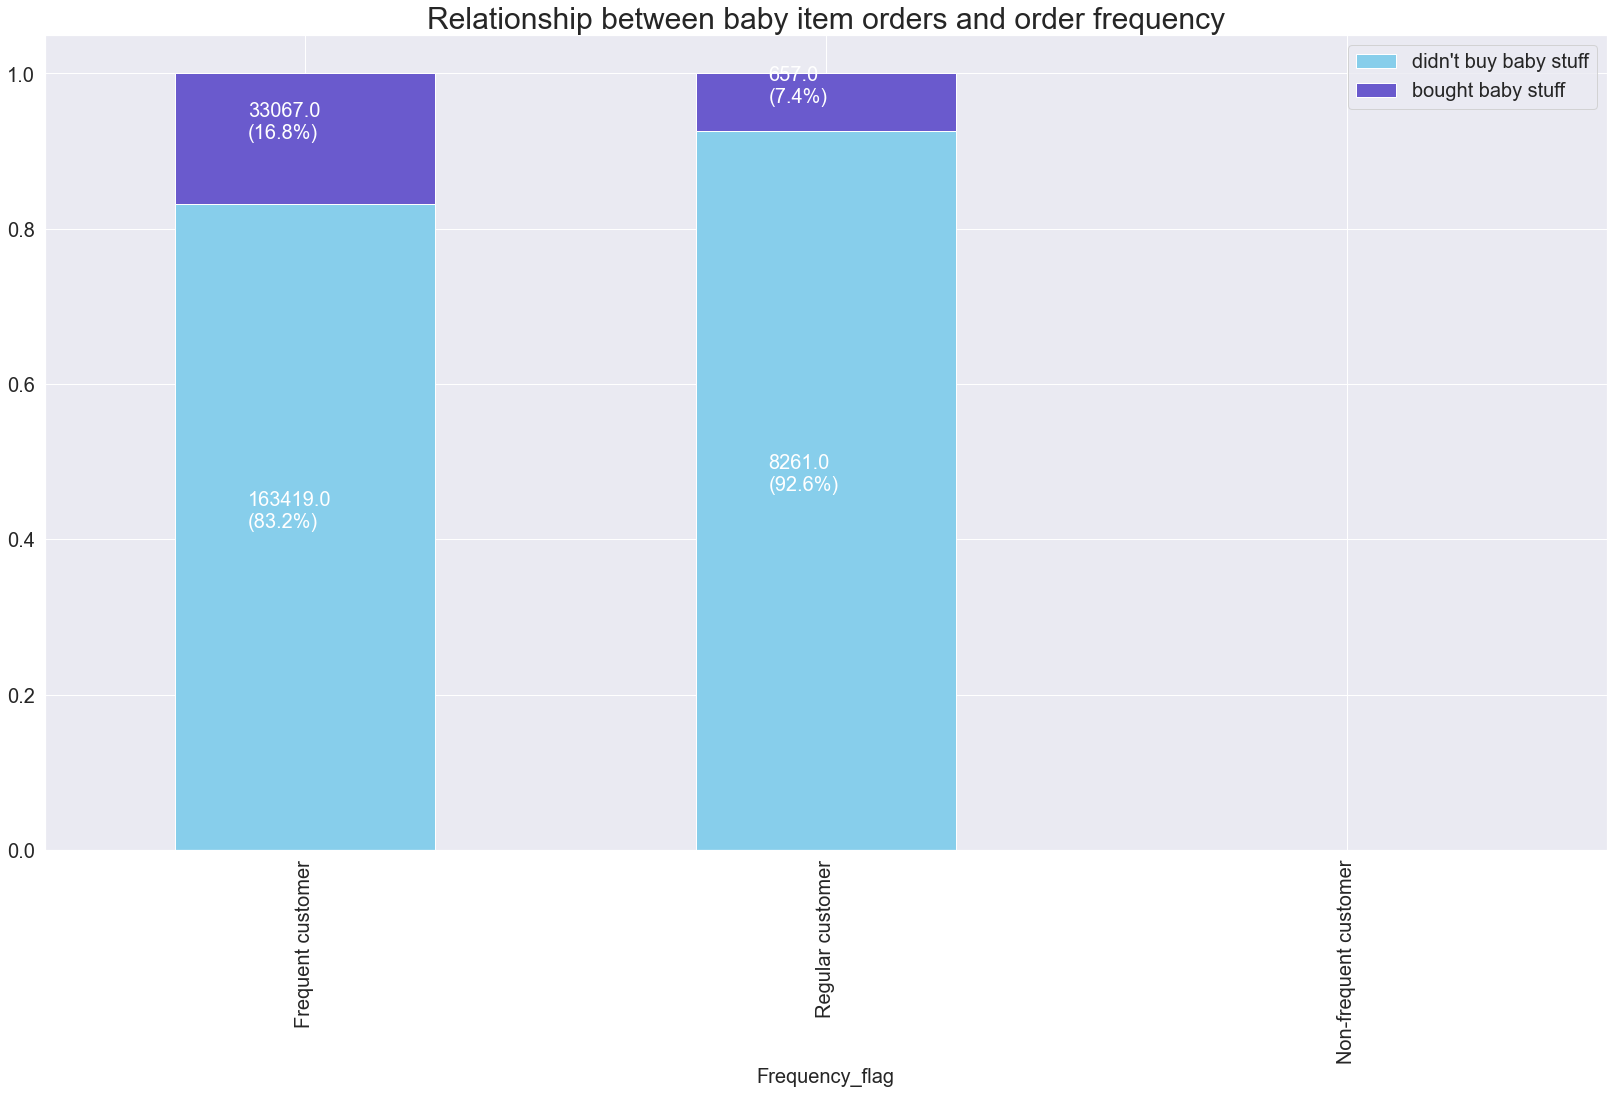

In [176]:
#Relationship between baby stuff orders and order frequency
bar_baby_frequency=baby_frequency.plot.bar(stacked=True,color=['#87CEEB', '#6A5ACD','#708090'], fontsize=20)
plt.title('Relationship between baby item orders and order frequency', fontsize=30)
plt.xlabel('Frequency_flag', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*baby_frequency.index.values]):
    for (proportion, count, x_loc) in zip(baby_frequency.loc[y],
                                       baby_frequency_label.loc[y],
                                        baby_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

## f. Pet Profile

In [97]:
#creating cross tabs to display regions and ordering pet stuff
pet_region=pd.crosstab(index=df_unique['region'], columns=df_unique['pet_status'], normalize='index')
pet_region=pet_region.reindex(['South', 'West','Midwest',  'Northeast'])
pet_region=pet_region.rename(columns={0:'didn\'t buy pet items', 1:'bought pet items'})
pet_region_labels=pd.crosstab(index=df_unique['region'], columns=df_unique['pet_status'])
pet_region_labels=pet_region_labels.reindex(['South', 'West','Midwest',  'Northeast'])
pet_region_labels=pet_region_labels.rename(columns={0:'didn\'t purchase pet items', 1:'purchased pet items'})
pet_region_labels

pet_status,didn't purchase pet items,purchased pet items
region,,
South,63533,4902
West,48442,3917
Midwest,44842,3516
Northeast,33611,2647


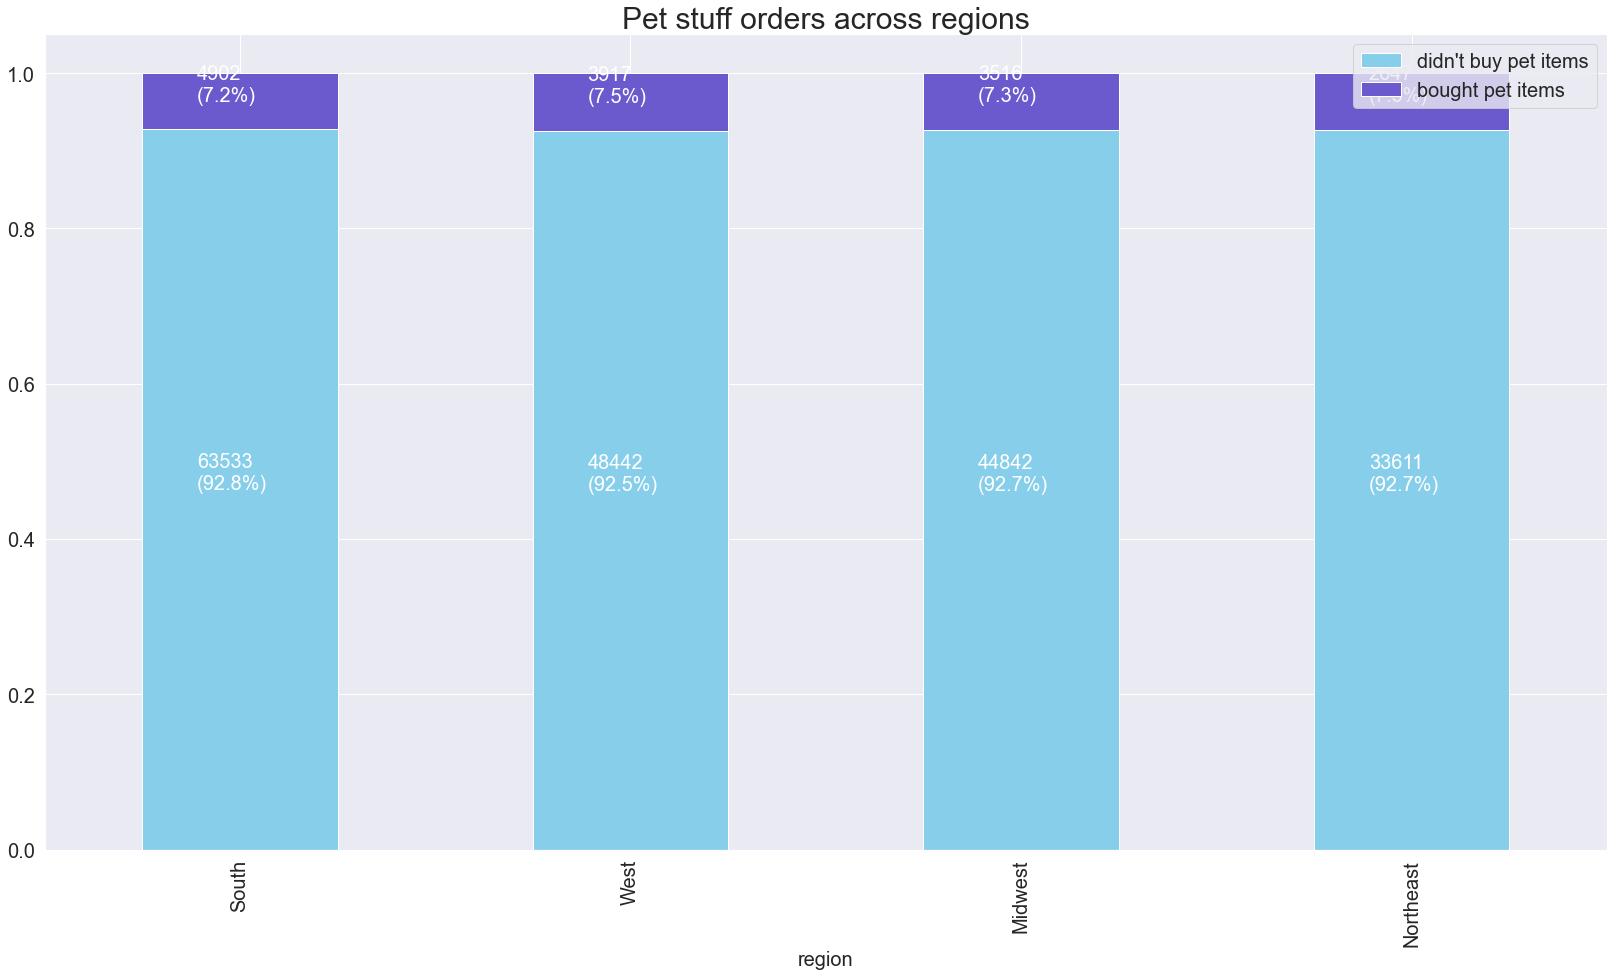

In [98]:
#Relationship between pet stuff orders and regions
pet_region_frequency=pet_region.plot.bar(stacked=True,color=['#87CEEB', '#6A5ACD','#708090'], fontsize=20)
plt.title('Pet stuff orders across regions', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*pet_region.index.values]):
    for (proportion, count, x_loc) in zip(pet_region.loc[y],
                                       pet_region_labels.loc[y],
                                        pet_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

# 03. Additional visualizations and analysis

In [99]:
#Dataframe for plotting linechart for orders
hour_day=df['order_hour_of_day'].value_counts().rename_axis('hour_of_day').reset_index(name='counts')
hour_day

,hour_of_day,counts
0,10,2761176
1,11,2735607
2,14,2688666
3,15,2661704
4,13,2660524
5,12,2618043
6,16,2534794
7,9,2453764
8,17,2087312
9,8,1717774


Text(0, 0.5, 'number of orders')

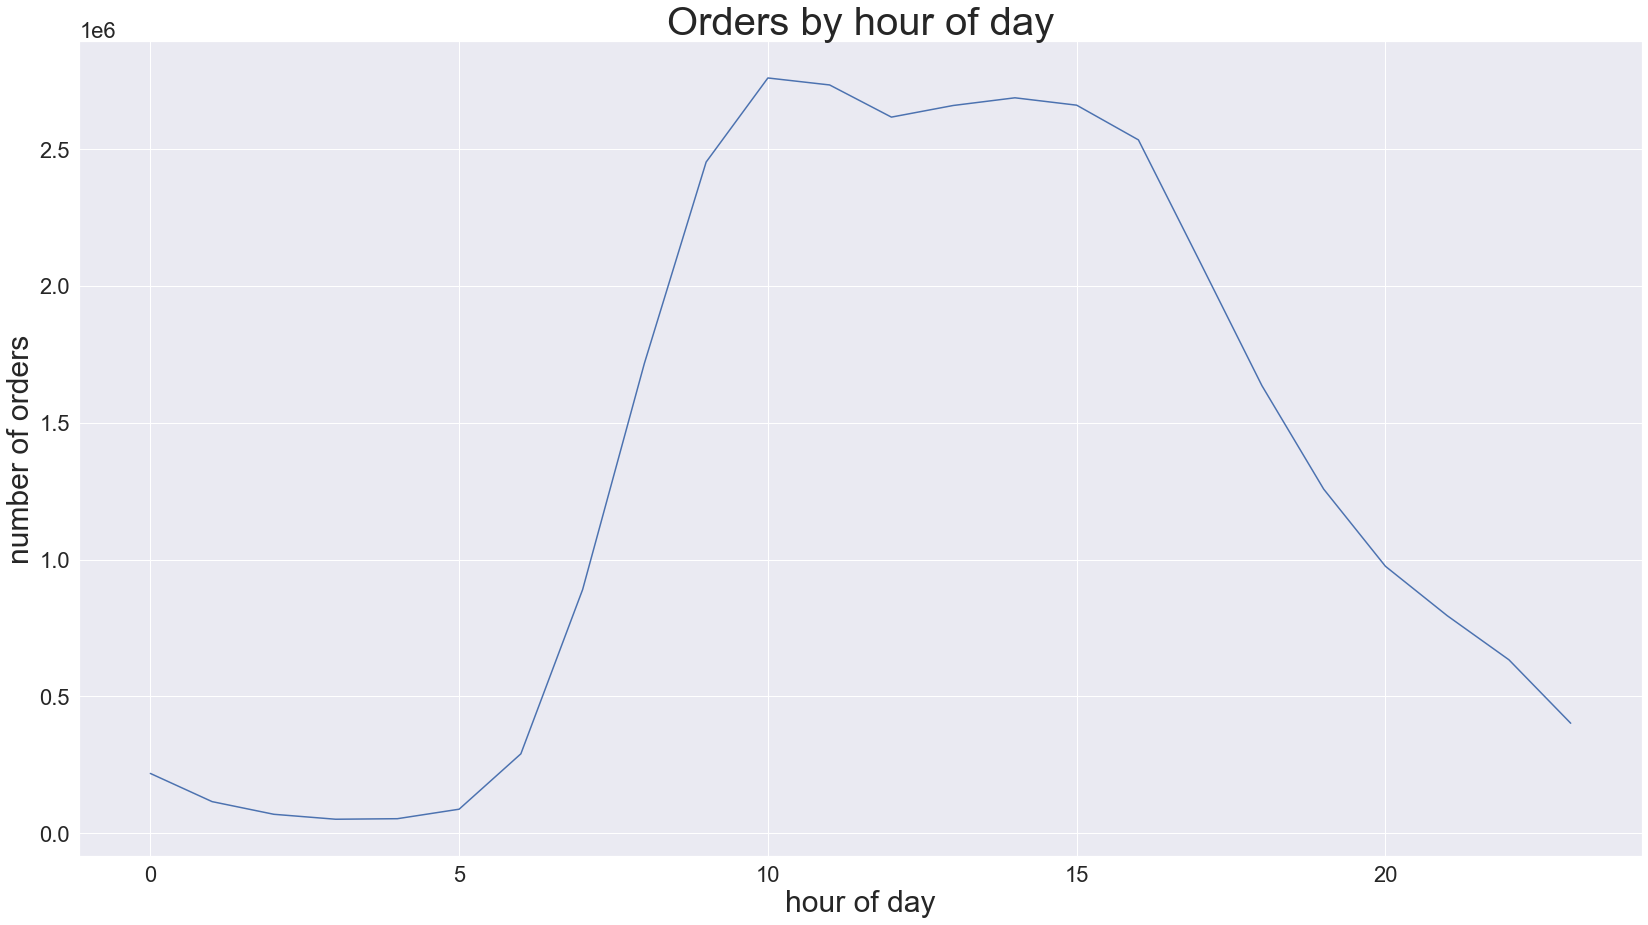

In [100]:
#Line chart of orders by hour of day
sns.set(font_scale = 2)
line_order_hour=sns.lineplot( data=hour_day, x='hour_of_day', y='counts', palette='#1a6985')
line_order_hour.axes.set_title("Orders by hour of day",fontsize=40)
line_order_hour.set_xlabel("hour of day",fontsize=30)
line_order_hour.set_ylabel("number of orders",fontsize=30)

In [102]:
#Dataframe for plotting linechart for orders
day_week=df['orders_day_of_week'].value_counts().rename_axis('day_of_week').to_frame(name='counts')
day_week=day_week.rename({0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
day_week=day_week.reindex(['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'])
day_week

,counts
day_of_week,
Saturday,6203190
Sunday,5659233
Monday,4213084
Tuesday,3839793
Wednesday,3783149
Thursday,4204993
Friday,4495651


Text(0, 0.5, 'number of orders')

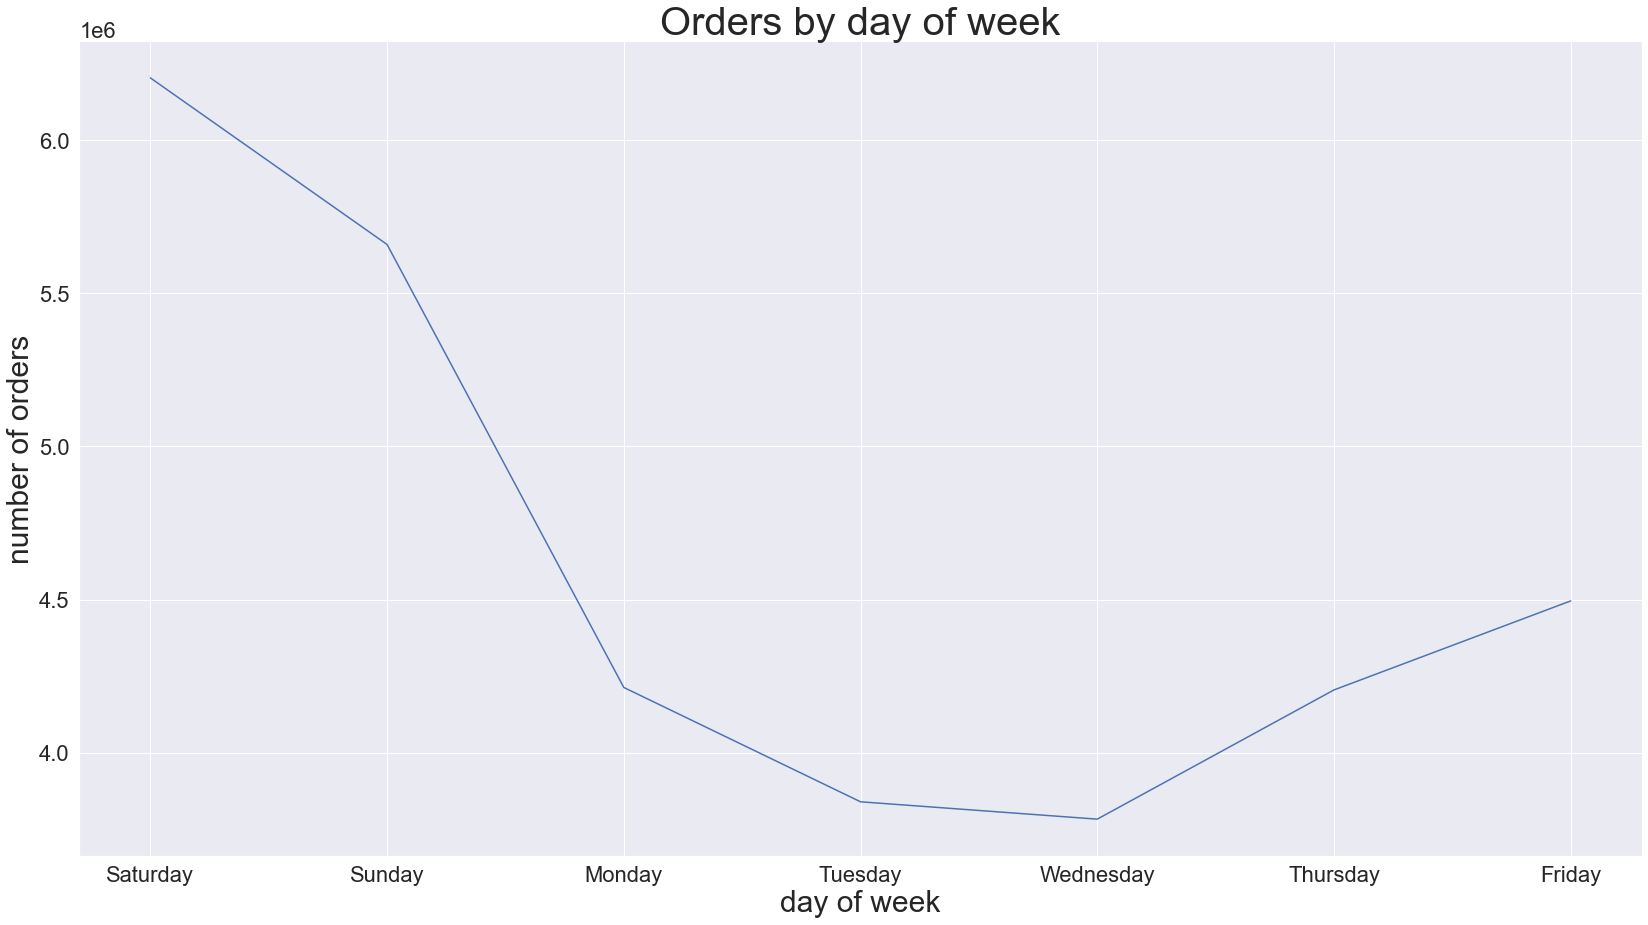

In [103]:
#Line chart of orders by day of week
sns.set(font_scale = 2)
line_order_day=sns.lineplot( data=day_week, x='day_of_week', y='counts', palette='#1a6985')
line_order_day.axes.set_title("Orders by day of week",fontsize=40)
line_order_day.set_xlabel("day of week",fontsize=30)
line_order_day.set_ylabel("number of orders",fontsize=30)

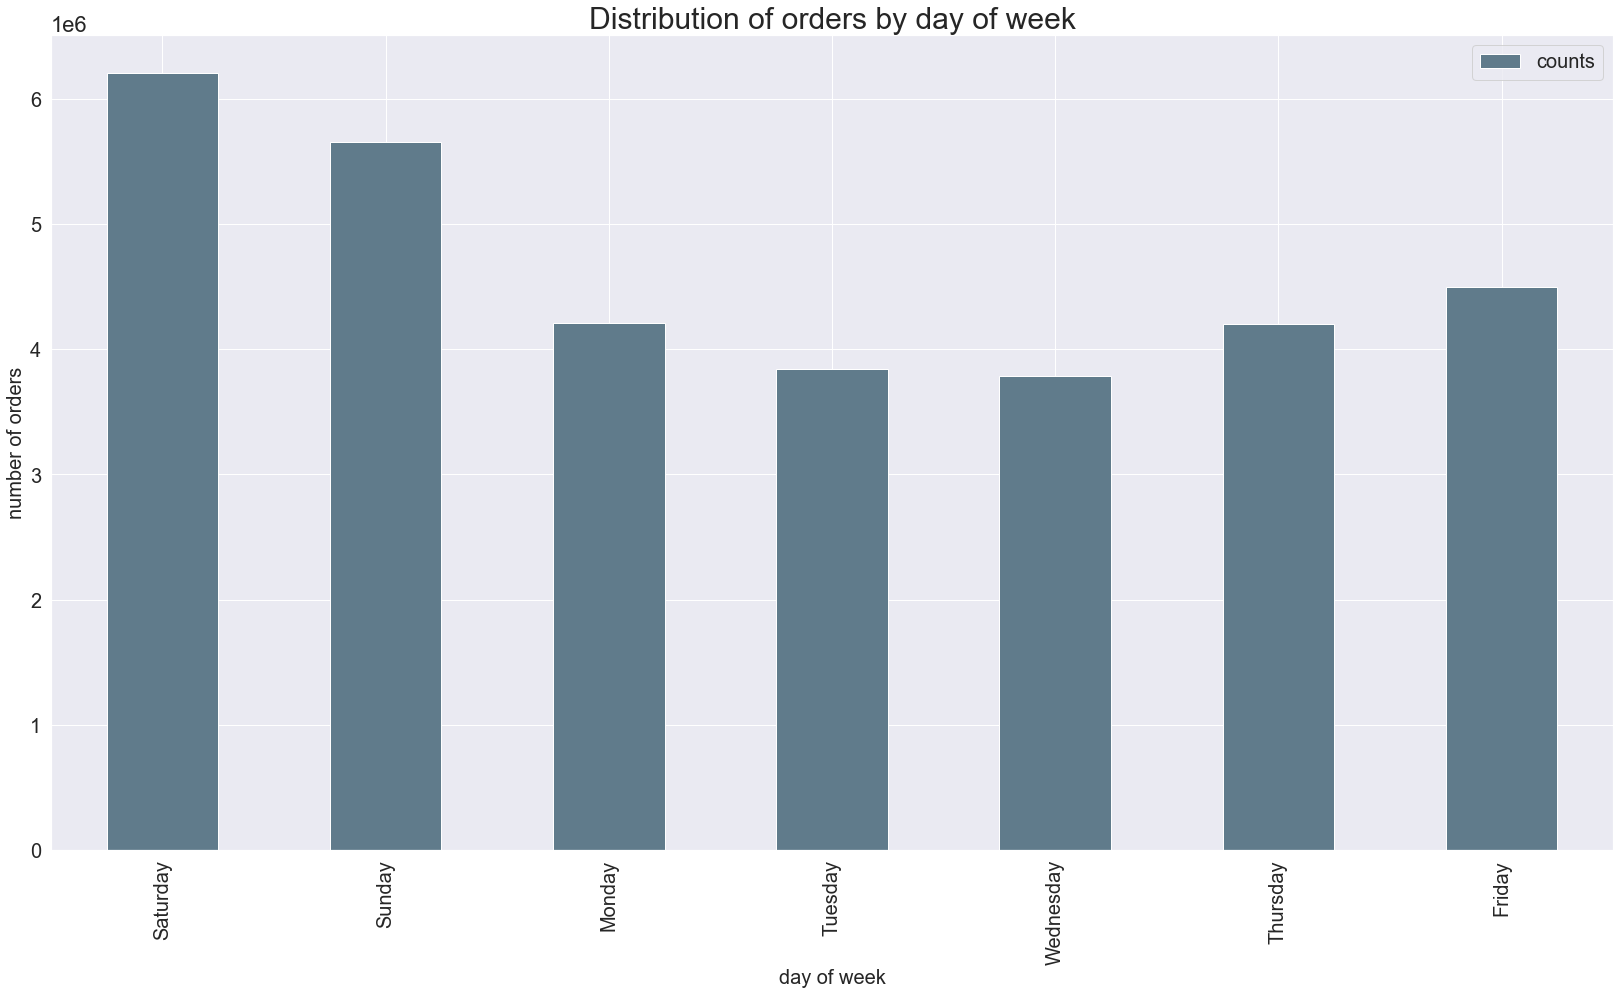

In [106]:
#Bar chart of orders by day of week
bar_order_week=day_week.plot.bar(color=['#607B8B'], fontsize=20)
plt.title('Distribution of orders by day of week', fontsize=30)
plt.xlabel('day of week', fontsize=20)
plt.ylabel('number of orders', fontsize=20)
plt.legend(fontsize=20)

In [107]:
#Data sampling
np.random.seed(4)
dev=np.random.rand(len(df))<=0.7
big=df[dev]
small=df[~dev]

Text(0, 0.5, 'average price of orders')

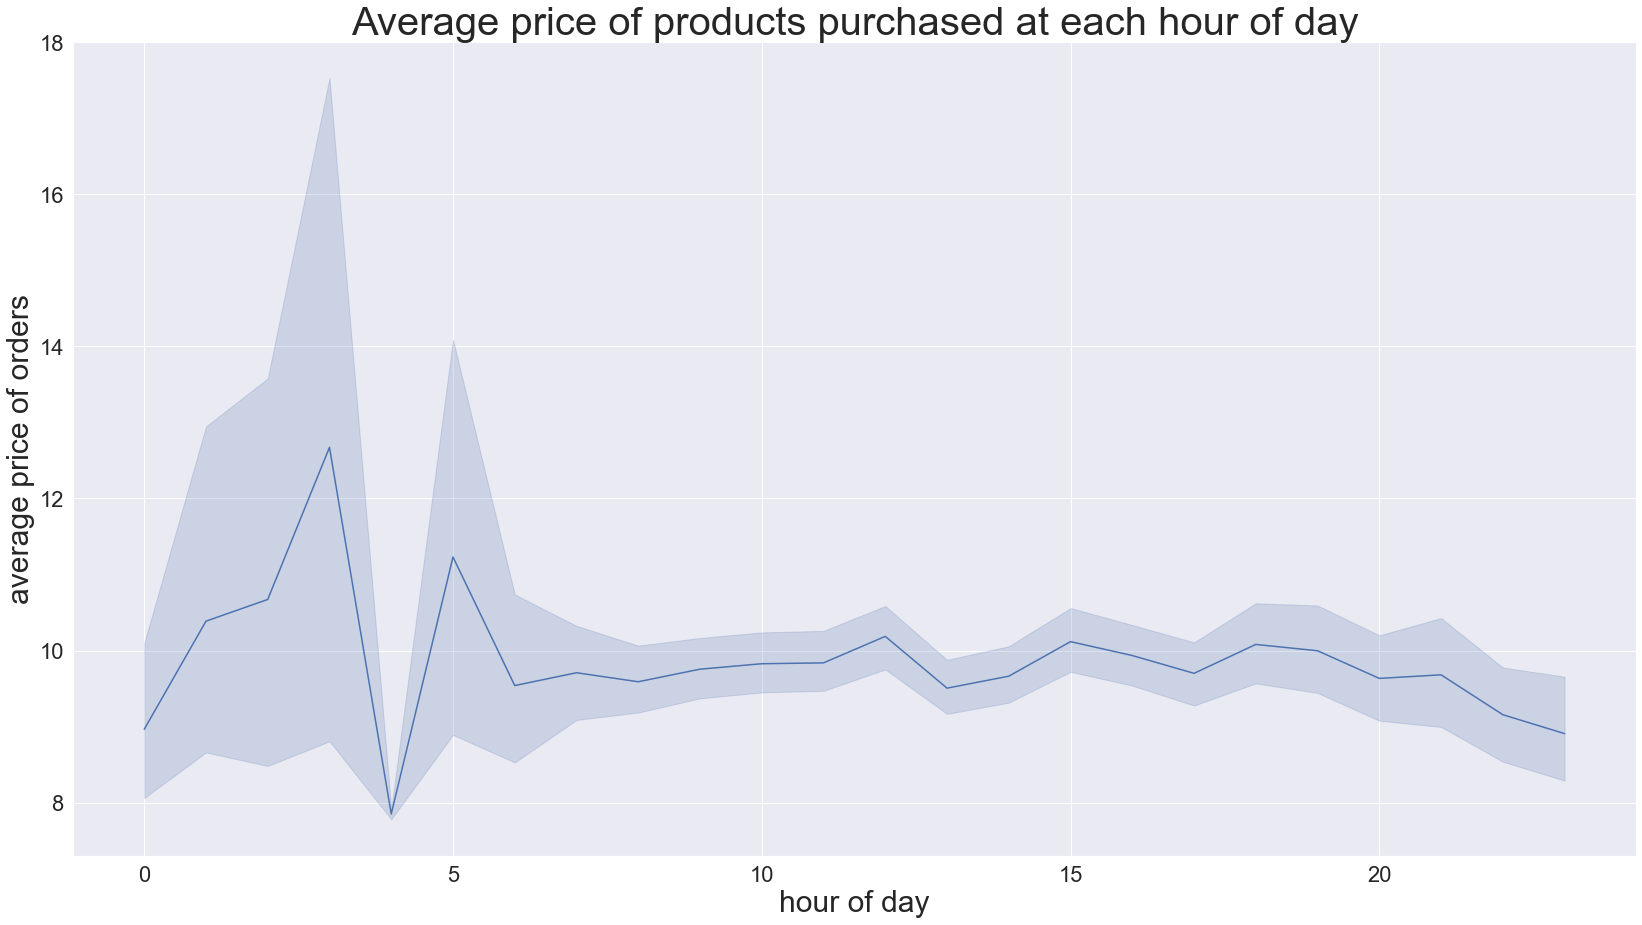

In [108]:
#Creating linechart average price of products purchased at each hour of day
sns.set(font_scale = 2)
line_order_price_hour=sns.lineplot( data=small, x='order_hour_of_day', y='prices', palette='#1a6985')
line_order_price_hour.axes.set_title("Average price of products purchased at each hour of day",fontsize=40)
line_order_price_hour.set_xlabel("hour of day",fontsize=30)
line_order_price_hour.set_ylabel("average price of orders",fontsize=30)

In [109]:
#Creating a subset with unique product names
df_product_unique=df.drop_duplicates(subset='product_name')

<AxesSubplot:title={'center':'Composition of products by price ranges'}>

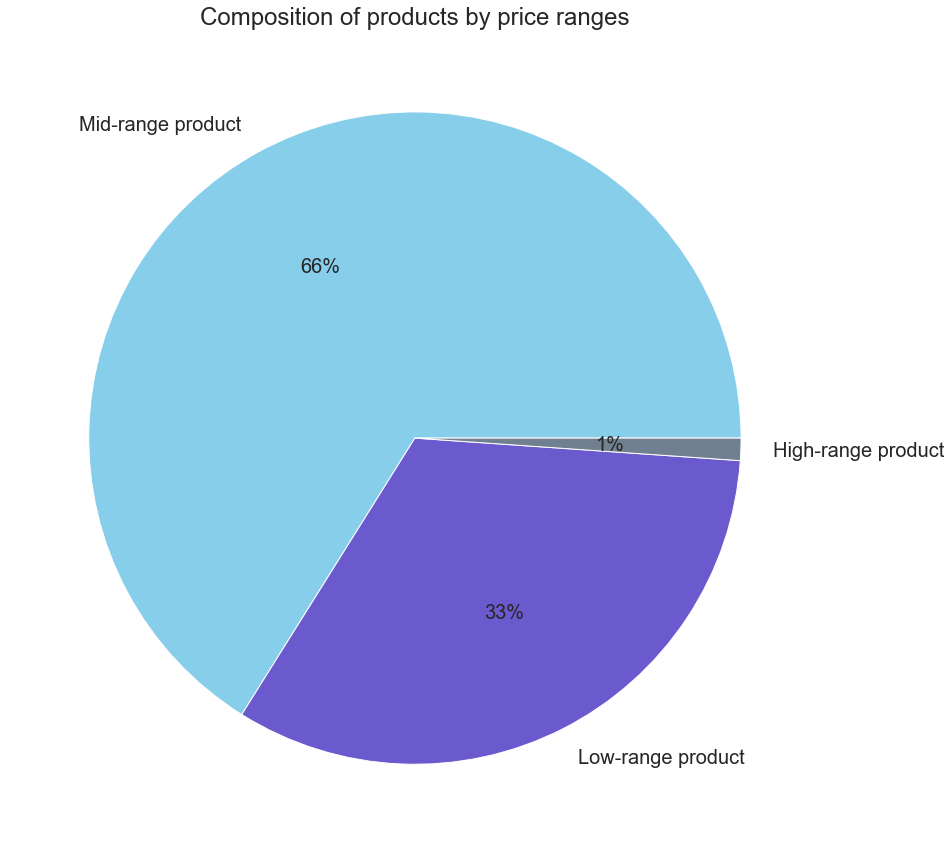

In [114]:
#Composition of products by price ranges
products=df_product_unique['price_range_loc'].value_counts(dropna=False)
pie_product_range=products.plot.pie(title='Composition of products by price ranges', label='',autopct=('%1.f%%'), colors=['#87CEEB', '#6A5ACD','#708090'], textprops={'fontsize': 20})
pie_product_range

<AxesSubplot:title={'center':'Orders by product ranges'}>

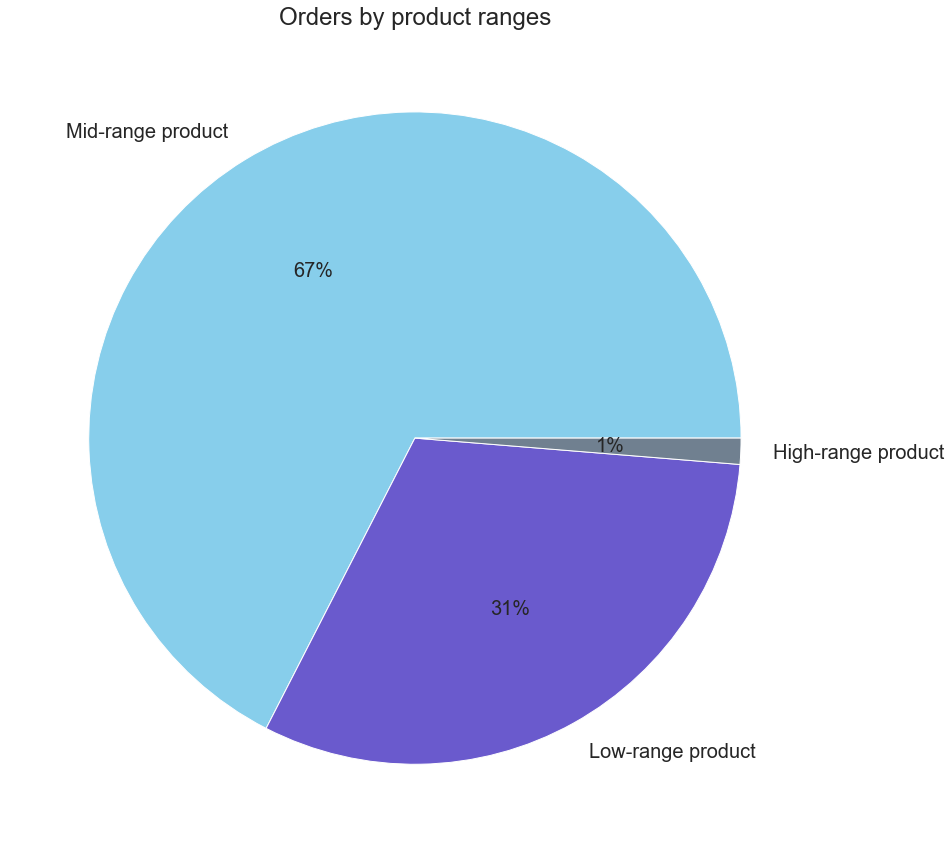

In [116]:
#Composition of orders by product ranges
products_prices=df['price_range_loc'].value_counts(dropna=False)
pie_product_range_orders=products_prices.plot.pie(title='Orders by product ranges', label='',autopct=('%1.f%%'), colors=['#87CEEB', '#6A5ACD','#708090'], textprops={'fontsize': 20})
pie_product_range_orders

<AxesSubplot:title={'center':'Composition of orders by loyalty brands'}>

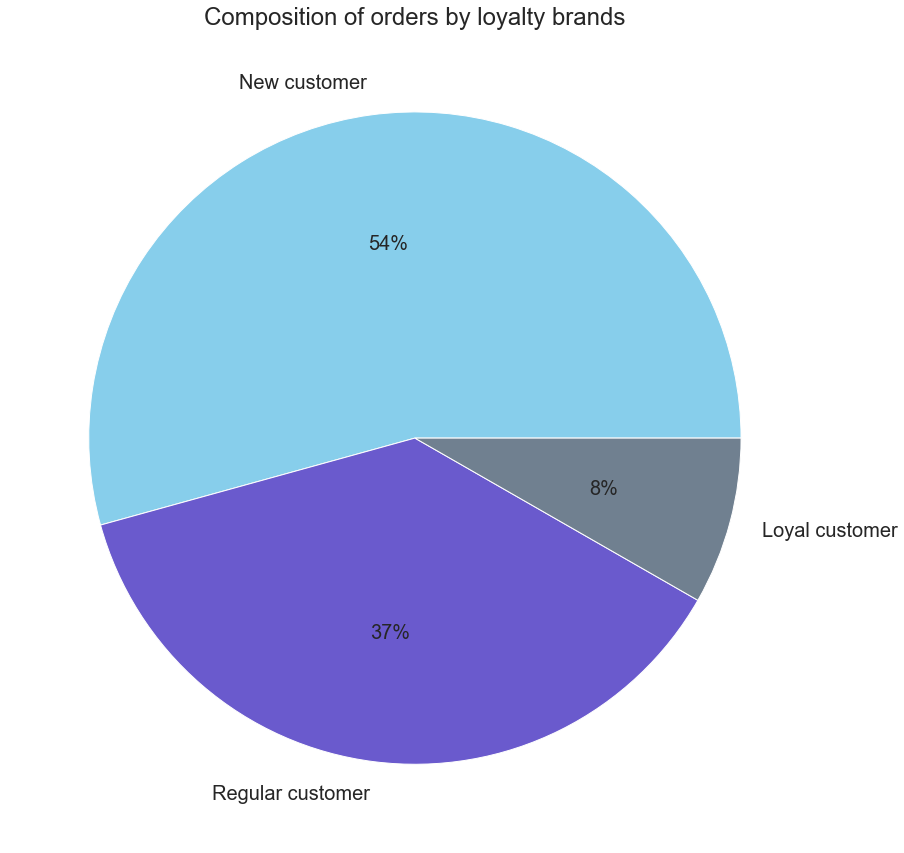

In [117]:
#Distribution of customers based on loyalty
customers_loyalty=df_unique['loyalty_flag'].value_counts(dropna=False)
pie_loyalty=customers_loyalty.plot.pie(title='Composition of orders by loyalty brands', label='',autopct=('%1.f%%'), colors=['#87CEEB', '#6A5ACD','#708090'], textprops={'fontsize': 20})
pie_loyalty


<AxesSubplot:title={'center':'Composition of orders by loyalty brands'}>

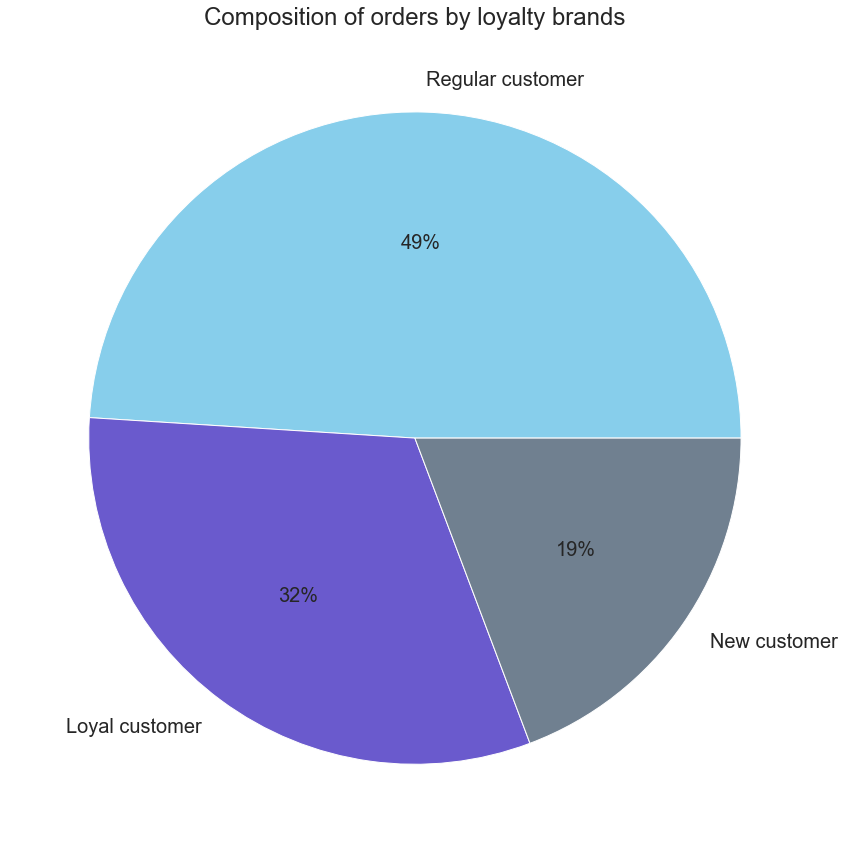

In [118]:
# Distribution of orders based on brand loyalty
customers_loyalty_orders=df['loyalty_flag'].value_counts(dropna=False)
pie_loyalty_orders=customers_loyalty_orders.plot.pie(title='Composition of orders by loyalty brands', label='',autopct=('%1.f%%'), colors=['#87CEEB', '#6A5ACD','#708090'], textprops={'fontsize': 20})
pie_loyalty_orders

In [119]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'busiest_days',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_order_days', 'Frequency_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'activity_flag',
       'department', 'region', 'total_orders', 'age_group', 'income_group',
       'dependant_flag', 'baby_status', 'pet_status', 'veggie_status',
       'alcohol_status'],
      dtype='object')

In [120]:
#Difference in spending habits among customers based on loyalty flag
df_unique.groupby(['loyalty_flag']).agg({'prices':['mean', 'min', 'max']})

prices                   
                       mean  min           max
loyalty_flag                                  
Loyal customer     7.765625  1.0     14.898438
New customer      11.750000  1.0  14896.000000
Regular customer   9.359375  1.0  14896.000000

In [121]:
#Difference in ordering frequency among customers based on loyalty flag
loyalty_order_frequency=df_unique.groupby(['loyalty_flag']).agg({'median_order_days':['mean', 'min', 'max']})
loyalty_order_frequency

median_order_days           
                              mean  min   max
loyalty_flag                                 
Loyal customer            7.444508  1.3  14.5
New customer              7.468959  1.0  25.0
Regular customer          7.444017  1.0  23.8

In [122]:
#Distribution of customers across regions
loyalty_region=pd.crosstab(df_unique['region'], df_unique['loyalty_flag'], normalize='index')
loyalty_region=loyalty_region.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns').reindex(['South', 'West','Midwest',  'Northeast'])
loyalty_region_labels=pd.crosstab(index=df_unique['region'], columns=df_unique['loyalty_flag'])
loyalty_region_labels=loyalty_region_labels.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns').reindex(['South', 'West','Midwest',  'Northeast'])
loyalty_region_labels

loyalty_flag,New customer,Regular customer,Loyal customer
region,,,
South,37189,25609,5637
West,28429,19568,4362
Midwest,26172,18195,3991
Northeast,19739,13492,3027


In [123]:
#Distribution of customers across regions
loyalty_region=pd.crosstab(df_unique['region'], df_unique['loyalty_flag'], normalize='index')
loyalty_region=loyalty_region.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns').reindex(['South', 'West','Midwest',  'Northeast'])
loyalty_region_labels=pd.crosstab(index=df_unique['region'], columns=df_unique['loyalty_flag'])
loyalty_region_labels=loyalty_region_labels.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns').reindex(['South', 'West','Midwest',  'Northeast'])
loyalty_region_labels

loyalty_flag,New customer,Regular customer,Loyal customer
region,,,
South,37189,25609,5637
West,28429,19568,4362
Midwest,26172,18195,3991
Northeast,19739,13492,3027


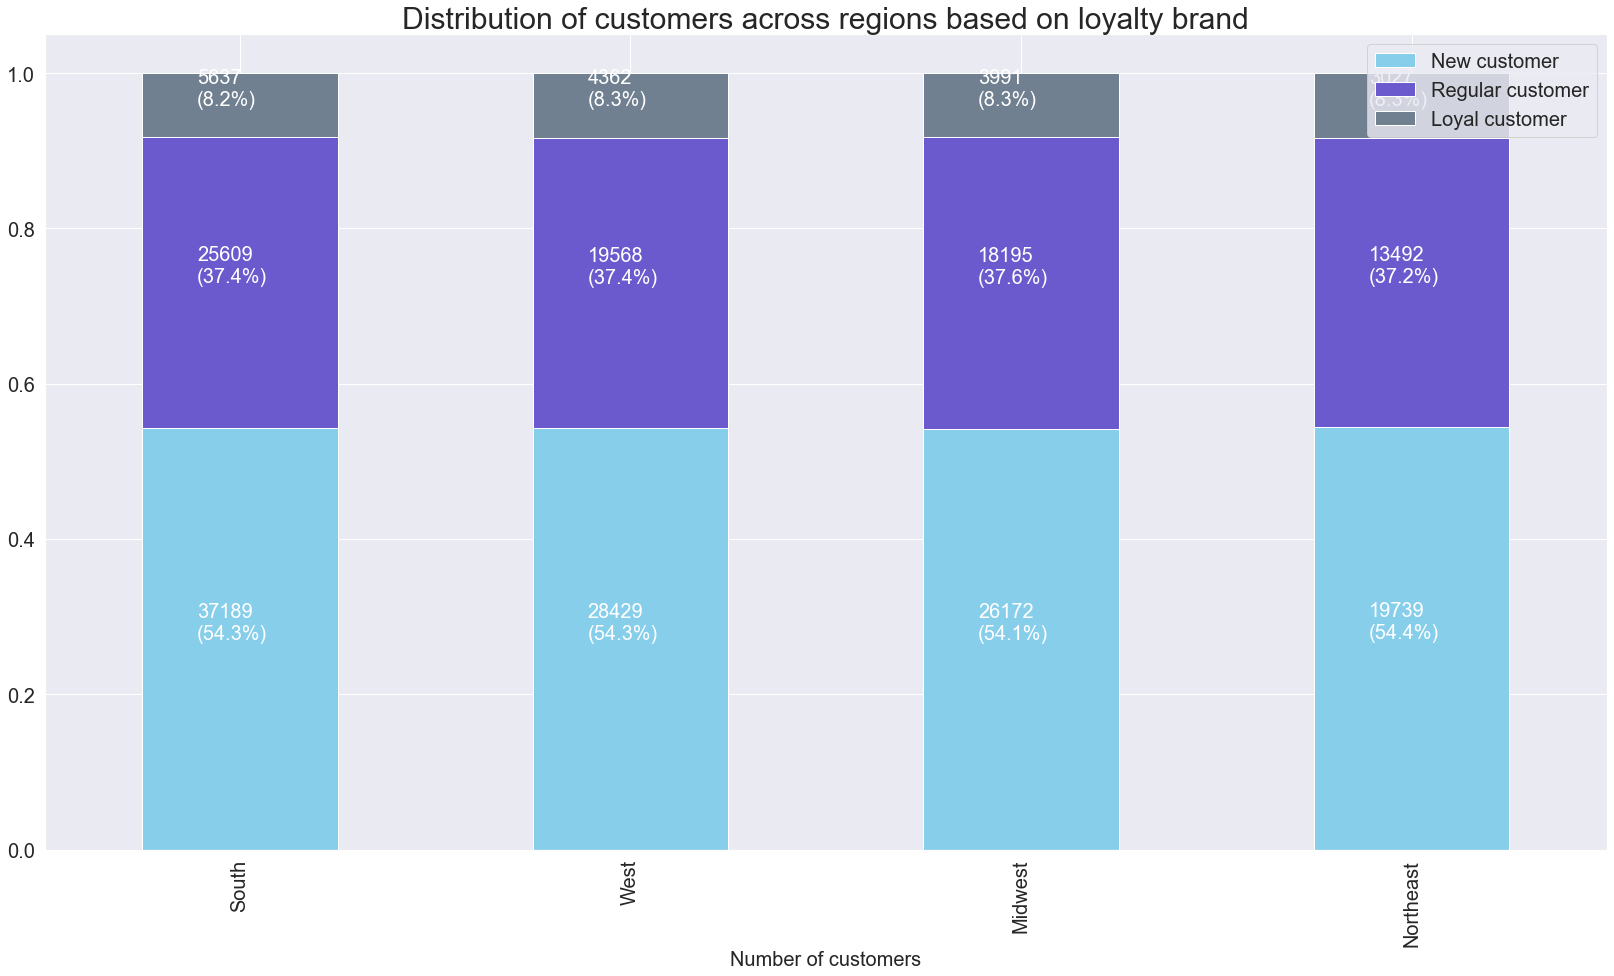

In [125]:
bar_loyalty_region=loyalty_region.plot.bar(stacked=True,color=['#87CEEB', '#6A5ACD','#708090'], fontsize=20)
plt.title('Distribution of customers across regions based on loyalty brand', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*pet_region.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_region.loc[y],
                                     loyalty_region_labels.loc[y],
                                        loyalty_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [128]:
#Spending habits of customers based on loyalty brand
df_loyalty_product_range=pd.crosstab(df['price_range_loc'], df_unique['loyalty_flag'], normalize='index')
df_loyalty_product_range=df_loyalty_product_range.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty_product_range_labels=pd.crosstab(index=df_unique['price_range_loc'], columns=df_unique['loyalty_flag'])
df_loyalty_product_range_labels=df_loyalty_product_range_labels.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty_product_range_labels

loyalty_flag,New customer,Regular customer,Loyal customer
price_range_loc,,,
High-range product,32,9,0
Low-range product,36937,24621,4929
Mid-range product,74560,52234,12088


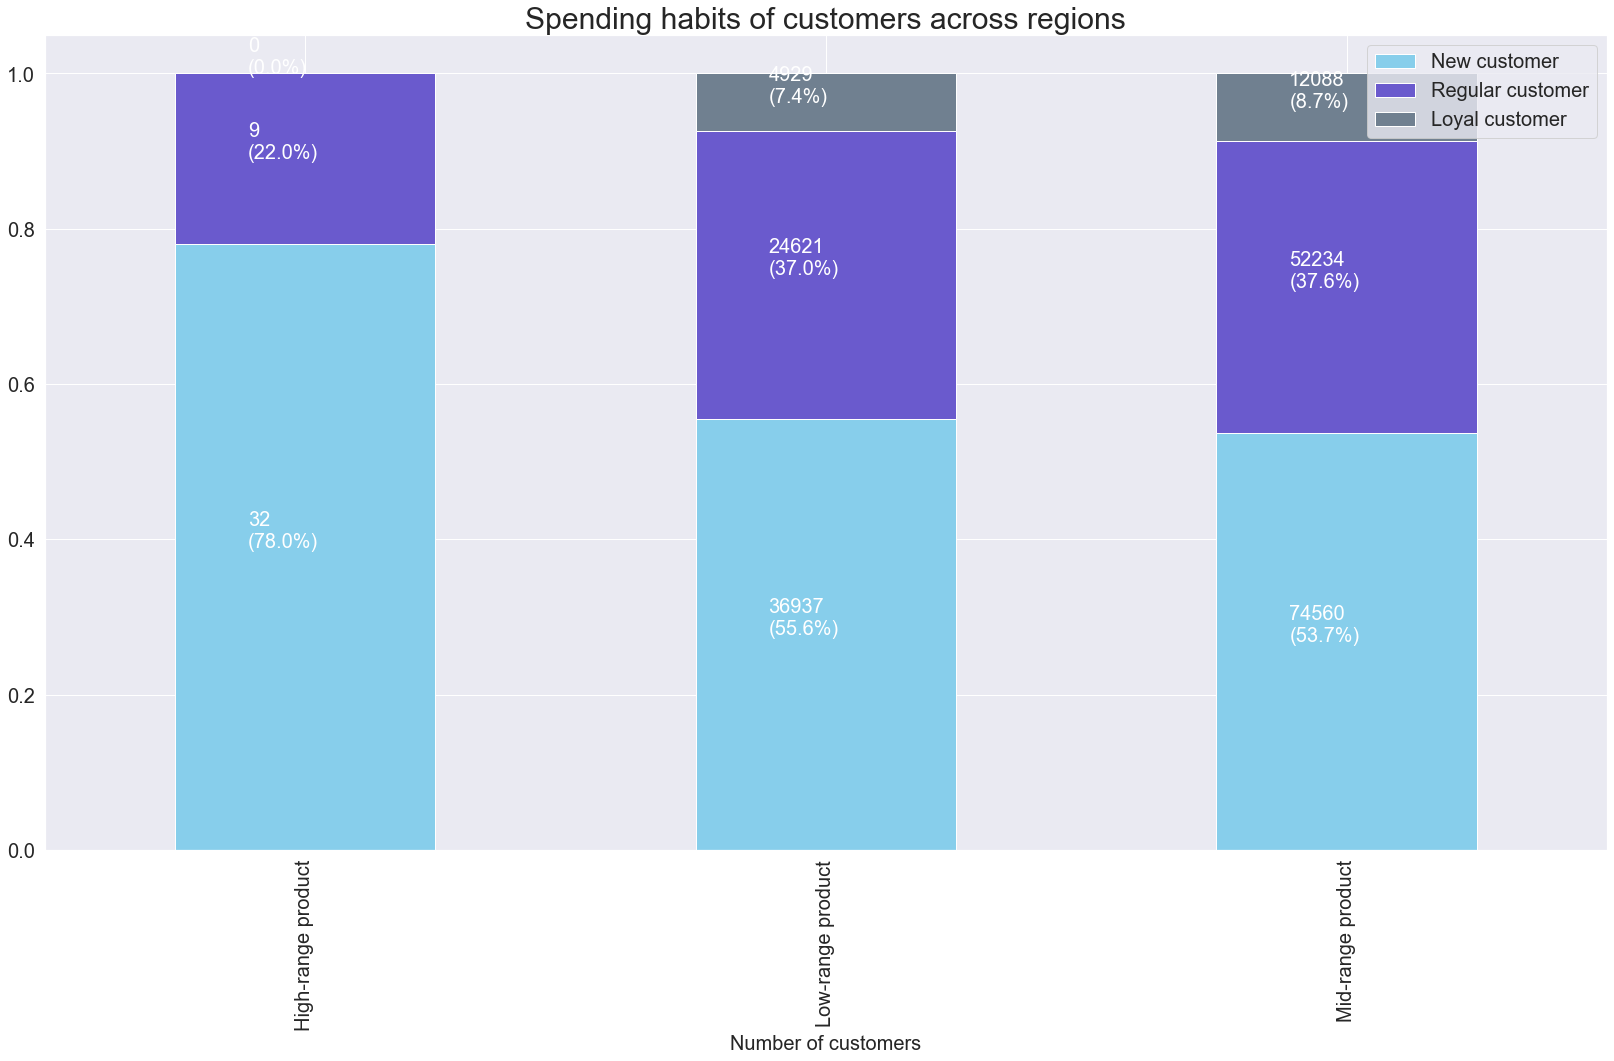

In [129]:
bar_loyalty_product_range=df_loyalty_product_range.plot.bar(stacked=True,color=['#87CEEB', '#6A5ACD','#708090'], fontsize=20)
plt.title('Spending habits of customers across regions', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*df_loyalty_product_range.index.values]):
    for (proportion, count, x_loc) in zip(df_loyalty_product_range.loc[y],
                                     df_loyalty_product_range_labels.loc[y],
                                        df_loyalty_product_range.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [130]:
#Distribution of orders based on region
df_region_product_range=pd.crosstab(df['region'], df_unique['price_range_loc'], normalize='index')
df_region_product_range=df_region_product_range.reindex(['Low-range product', 'Mid-range product', 'High-range product'], axis='columns').reindex(['South', 'West', 'Midwest', 'Northeast'])
df_region_product_range_labels=pd.crosstab(index=df_unique['region'], columns=df_unique['price_range_loc'])
df_region_product_range_labels=df_region_product_range_labels.reindex(['Low-range product', 'Mid-range product', 'High-range product'], axis='columns').reindex(['South', 'West', 'Midwest', 'Northeast'])
df_region_product_range_labels

price_range_loc,Low-range product,Mid-range product,High-range product
region,,,
South,22213,46211,11
West,16891,35453,15
Midwest,15530,32821,7
Northeast,11853,24397,8


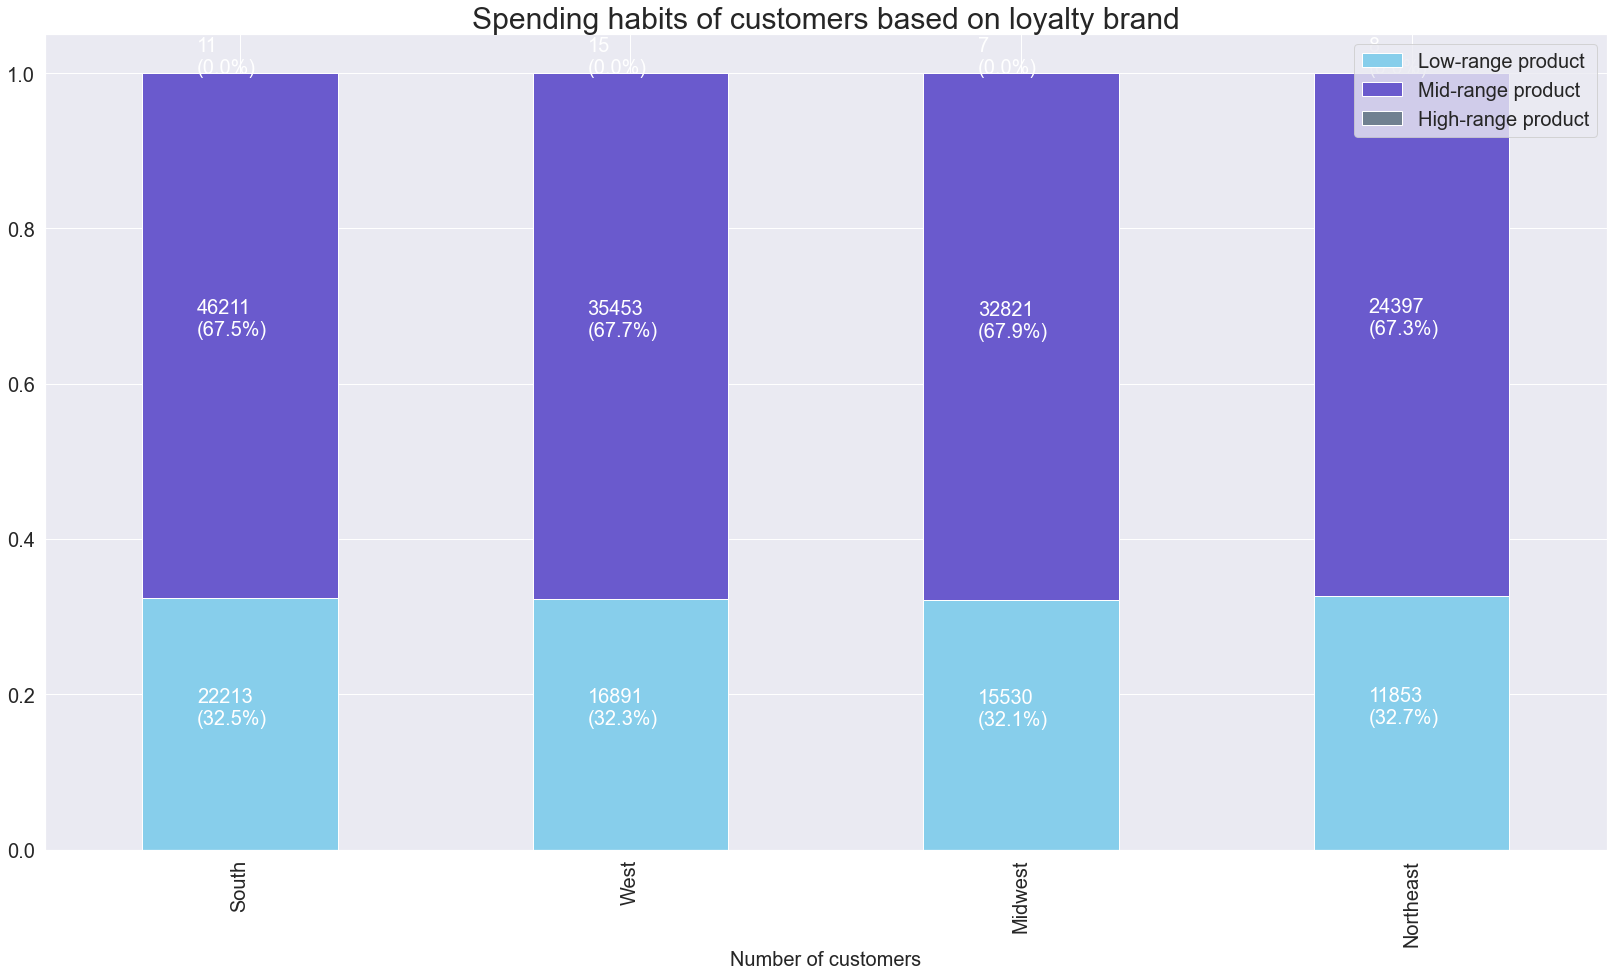

In [131]:
bar_region_product_range=df_region_product_range.plot.bar(stacked=True,color=['#87CEEB', '#6A5ACD','#708090'], fontsize=20)
plt.title('Spending habits of customers based on loyalty brand', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*df_region_product_range.index.values]):
    for (proportion, count, x_loc) in zip(df_region_product_range.loc[y],
                                     df_region_product_range_labels.loc[y],
                                        df_region_product_range.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

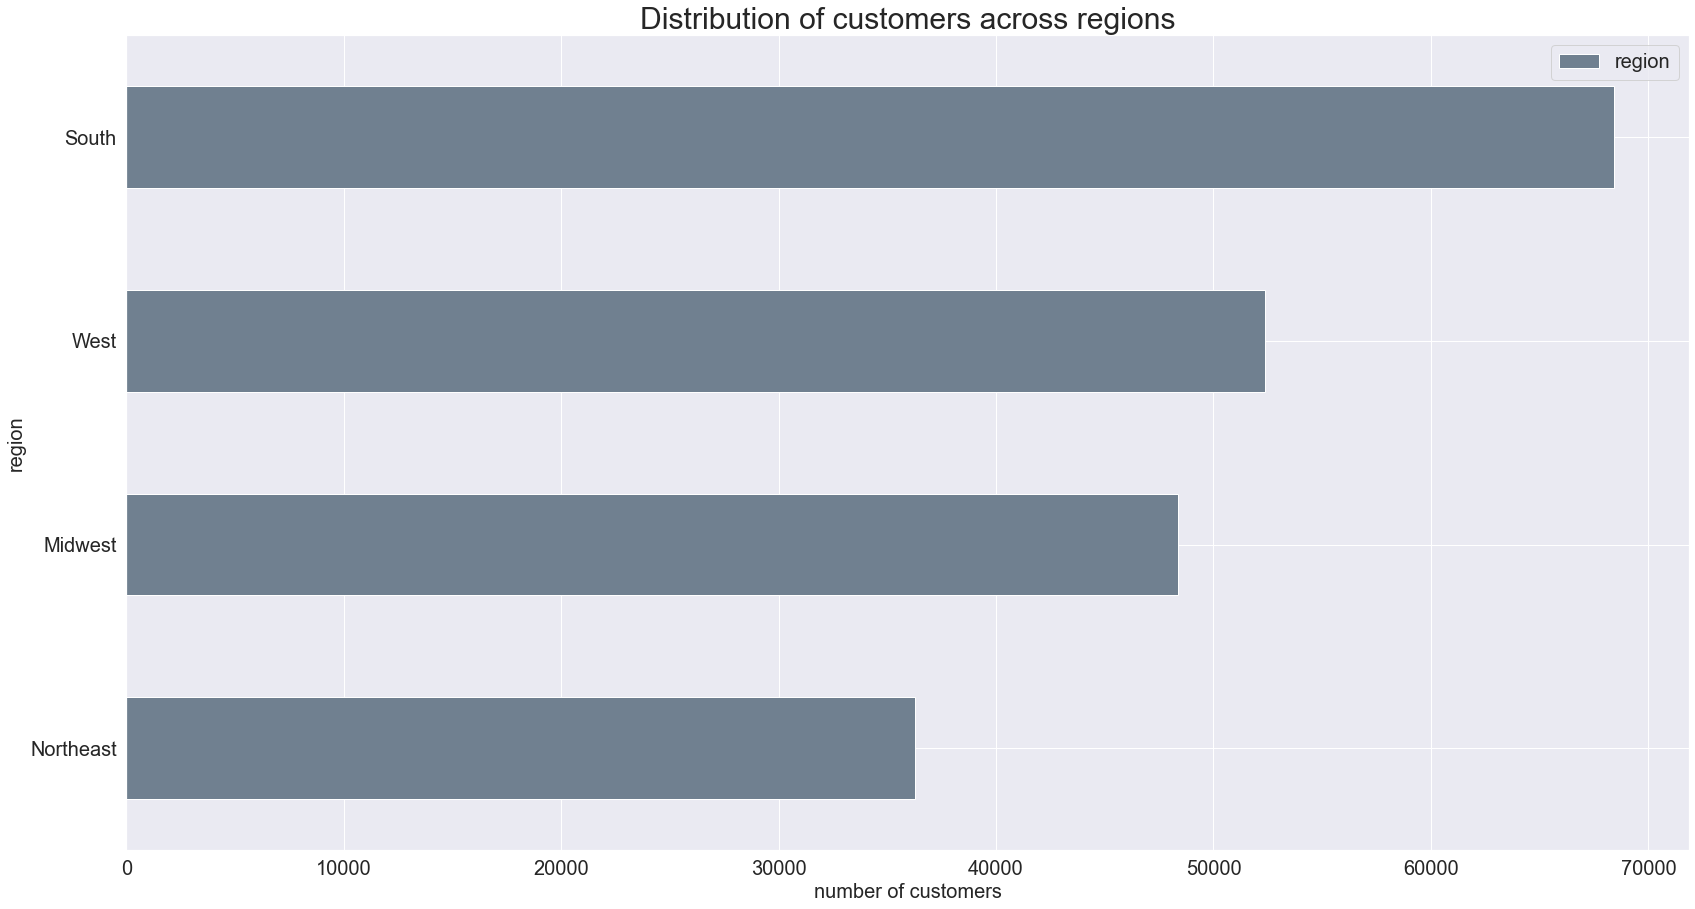

In [133]:
#Distribution of customers across regions
bar_region_customers=df_unique['region'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['#708090'], fontsize=20)
plt.title('Distribution of customers across regions', fontsize=30)
plt.xlabel('number of customers', fontsize=20)
plt.ylabel('region', fontsize=20)
plt.legend(fontsize=20)

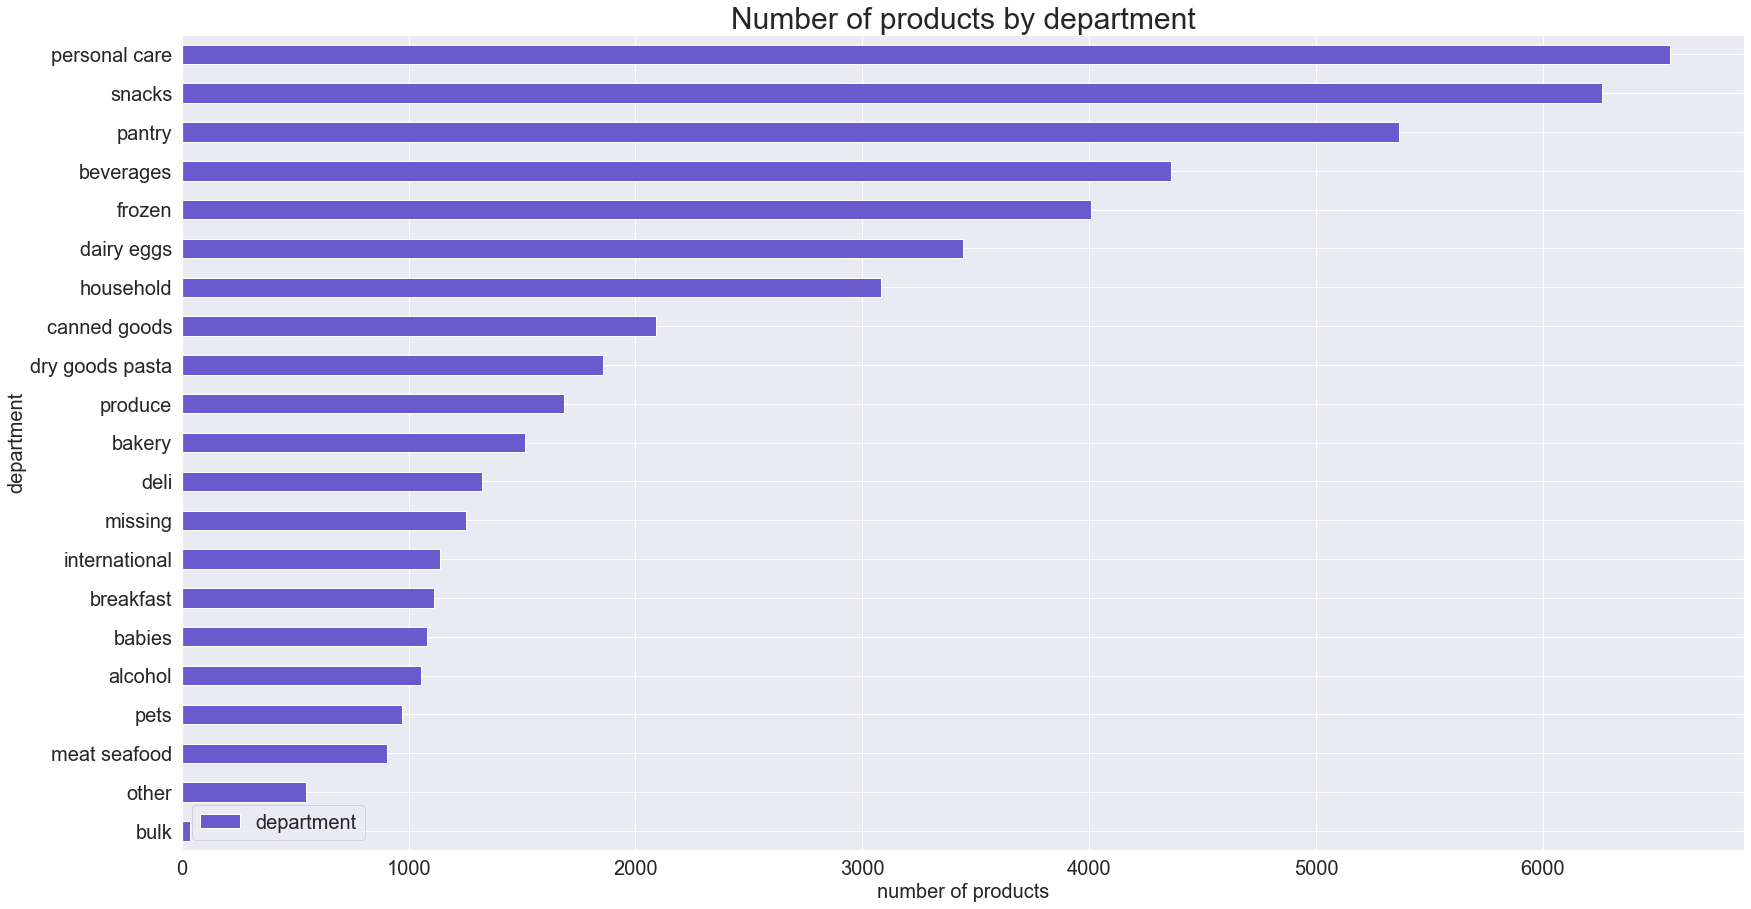

In [135]:
#Number of products by department
bar_department_orders=df_product_unique['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['#6A5ACD'], fontsize=20)
plt.title('Number of products by department', fontsize=30)
plt.xlabel('number of products', fontsize=20)
plt.ylabel('department', fontsize=20)
plt.legend(fontsize=20)

# 04. Exporting visualizations

In [142]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))
bar_department_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_orders.png'))
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department.png'))
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))
bar_income_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_price.png'))
bar_dependant_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependant_frequency.png'))
bar_baby_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_baby_frequency.png'))
pet_region_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_region_frequency.png'))
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_region.png'))

posx and posy should be finite values
posx and posy should be finite values


In [137]:
pie_loyal_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyal_age.png'))
pie_regular_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_regular_age.png'))
pie_new_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_new_age.png'))
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))
pie_product_range_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_product_range_orders.png'))
pie_product_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_product_range.png'))
pie_loyalty_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty_orders.png'))

In [138]:
line_age_ordertime.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_ordertime.png'))
line_age_orderday.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_orderday.png'))
line_order_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour.png'))
line_order_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_day.png'))
line_order_price_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_price_hour.png'))

In [141]:
bar_order_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_weekday.png'))
bar_department_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_orders.png'))
bar_loyalty_product_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_product_range.png'))
bar_region_product_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_product_range.png'))
bar_region_customers.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_customers.png'))